Declaração do problema:¶
Com uma infinidade de dados médicos disponíveis e a ascensão da Ciência de Dados, uma série de startups estão a assumir o desafio de tentar criar indicadores para as doenças previstas que podem ser contraídas! As doenças cardiovasculares (DCV) são a causa número 1 de morte em todo o mundo, ceifando cerca de 17,9 milhões de vidas a cada ano, o que representa 31% de todas as mortes em todo o mundo. A insuficiência cardíaca é um evento comum causado por DCV. Pessoas com doenças cardiovasculares ou que apresentam alto risco cardiovascular (devido à presença de um ou mais fatores de risco, como hipertensão, diabetes, hiperlipidemia ou doença já estabelecida) necessitam de detecção e gestão precoces, onde um modelo de aprendizagem automática pode ser de grande ajuda. Desta forma, tentamos resolver automatizar outro problema que ocorre na natureza com o objetivo de combatê-lo e focar no próximo problema com a ajuda de técnicas de IA!

Mirar :
Classificar/prever se um paciente é propenso à insuficiência cardíaca dependendo de múltiplos atributos.
É uma classificação binária com múltiplas características numéricas e categóricas

Dataset Attributes
Age : age of the patient [years]
Sex : sex of the patient [M: Male, F: Female]
ChestPainType : chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]
RestingBP : resting blood pressure [mm Hg]
Cholesterol : serum cholesterol [mm/dl]
FastingBS : fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]
RestingECG : resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]
MaxHR : maximum heart rate achieved [Numeric value between 60 and 202]
ExerciseAngina : exercise-induced angina [Y: Yes, N: No]
Oldpeak : oldpeak = ST [Numeric value measured in depression]
ST_Slope : the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]
HeartDisease : output class [1: heart disease, 0: Normal]

In [5]:
#Importando as livrarias necessárias.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.options.display.float_format = '{:.2f}'.format
import warnings
warnings.filterwarnings('ignore')

In [7]:
data = pd.read_csv('heart.csv')
data.head()

Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195          0     Normal    122   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              N     0.00       Up             0  
1              N     1.00     Flat             1  
2              N     0.00       Up             0  
3              Y     1.50     Flat             1  
4              N     0.00       Up             0

In [9]:
#Informações do Dataframe
data.shape

(918, 12)

In [11]:
data.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


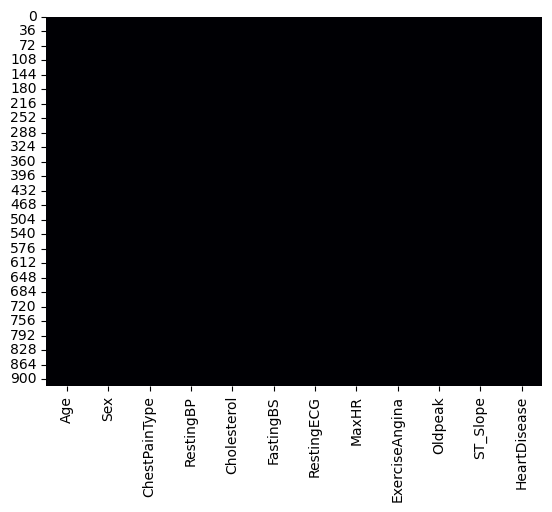

In [15]:
sns.heatmap(data.isnull(),cmap = 'magma',cbar = False);

Nenhum valor nulo presente nos dados!

In [30]:
data.describe().T

count   mean    std   min    25%    50%    75%    max
Age          918.00  53.51   9.43 28.00  47.00  54.00  60.00  77.00
RestingBP    918.00 132.40  18.51  0.00 120.00 130.00 140.00 200.00
Cholesterol  918.00 198.80 109.38  0.00 173.25 223.00 267.00 603.00
FastingBS    918.00   0.23   0.42  0.00   0.00   0.00   0.00   1.00
MaxHR        918.00 136.81  25.46 60.00 120.00 138.00 156.00 202.00
Oldpeak      918.00   0.89   1.07 -2.60   0.00   0.60   1.50   6.20
HeartDisease 918.00   0.55   0.50  0.00   0.00   1.00   1.00   1.00

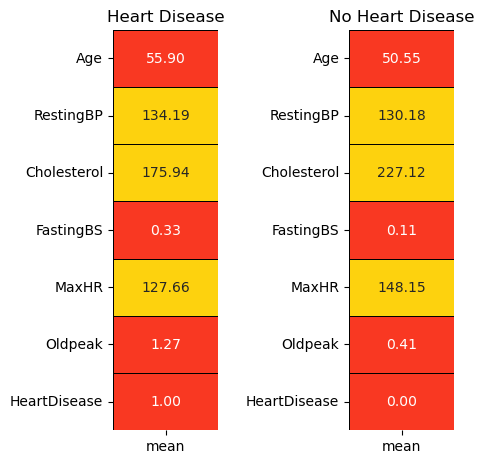

In [32]:
# Criando dois heatmaps comparando a média de variáveis entre pacientes com e sem doenças cardíacas.

yes = data[data['HeartDisease'] == 1].describe().T
no = data[data['HeartDisease'] == 0].describe().T
colors = ['#F93822','#FDD20E']

fig,ax = plt.subplots(nrows = 1,ncols = 2,figsize = (5,5))
plt.subplot(1,2,1)
sns.heatmap(yes[['mean']],annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black',cbar = False,fmt = '.2f',)
plt.title('Heart Disease');

plt.subplot(1,2,2)
sns.heatmap(no[['mean']],annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black',cbar = False,fmt = '.2f')
plt.title('No Heart Disease');

fig.tight_layout(pad = 2)

Valores médios de todas as características para casos de doenças cardíacas e não cardíacas.

In [38]:
#Dividindo recursos em numéricos e categóricos

col = list(data.columns)
categorical_features = []
numerical_features = []
for i in col:
    if len(data[i].unique()) > 6:
        numerical_features.append(i)
    else:
        categorical_features.append(i)

print('Categoricos :',*categorical_features)
print('Numericos :',*numerical_features)

Categoricos : Sex ChestPainType FastingBS RestingECG ExerciseAngina ST_Slope HeartDisease
Numericos : Age RestingBP Cholesterol MaxHR Oldpeak


Aqui, os recursos categóricos são definidos se o atributo tiver menos de 6 elementos únicos, caso contrário, é um recurso numérico.
A abordagem típica para esta divisão de recursos também pode ser baseada nos tipos de dados dos elementos do respectivo atributo.
Ex: tipo de dados = inteiro, atributo = recurso numérico; tipo de dados = string, atributo = recurso categórico

Para este conjunto de dados, como o número de recursos é menor, também podemos verificar manualmente o conjunto de dados.

In [40]:
#Categóricos

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df1 = data.copy(deep = True)

df1['Sex'] = le.fit_transform(df1['Sex'])
df1['ChestPainType'] = le.fit_transform(df1['ChestPainType'])
df1['RestingECG'] = le.fit_transform(df1['RestingECG'])
df1['ExerciseAngina'] = le.fit_transform(df1['ExerciseAngina'])
df1['ST_Slope'] = le.fit_transform(df1['ST_Slope'])

Criação de uma cópia profunda do conjunto de dados original e codificação de rótulo dos dados de texto dos recursos categóricos.
As modificações no conjunto de dados original não serão destacadas nesta cópia detalhada.
Portanto, usamos esta cópia profunda do conjunto de dados que possui todos os recursos convertidos em valores numéricos para fins de visualização e modelagem.

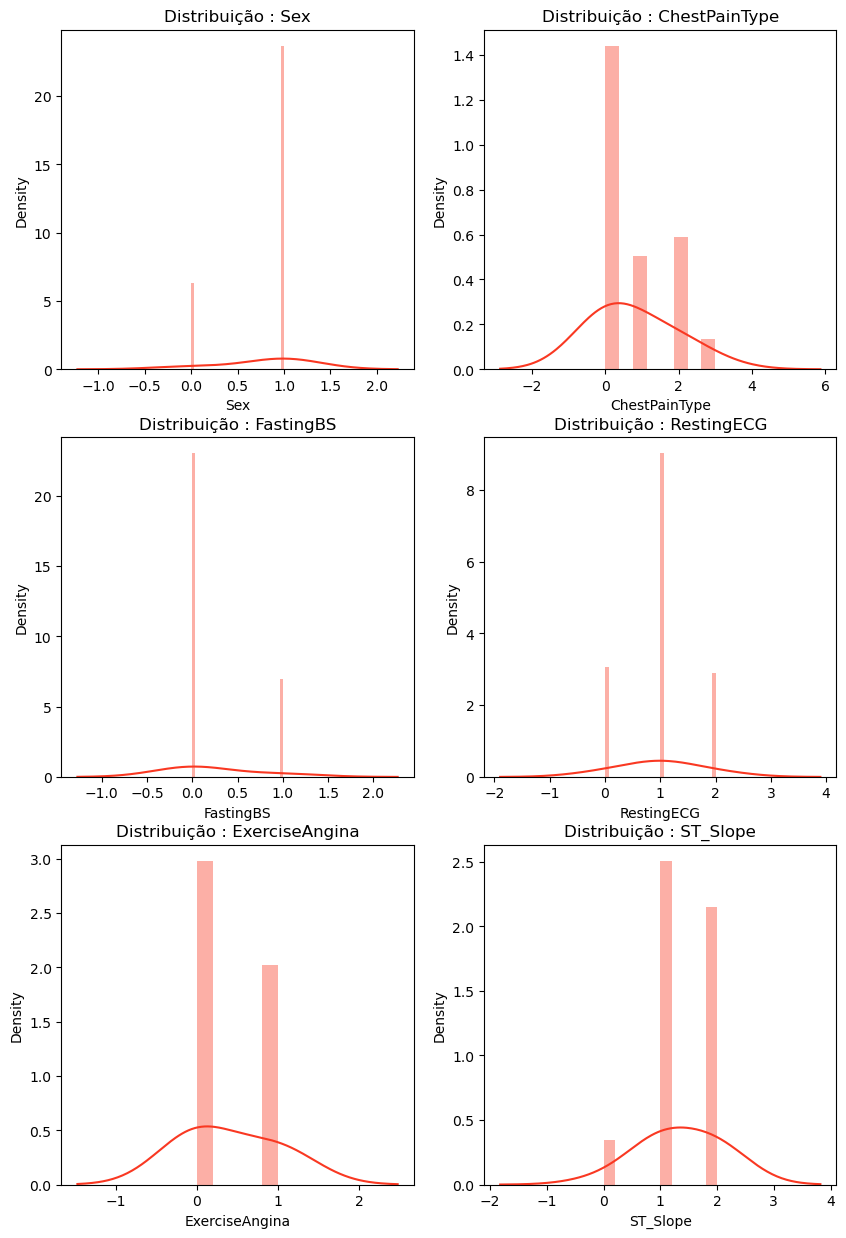

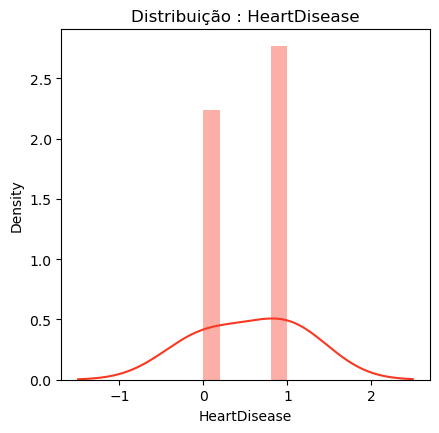

In [46]:
#Distribuição de recursos categóricos

fig, ax = plt.subplots(nrows = 3,ncols = 2,figsize = (10,15))
for i in range(len(categorical_features) - 1):
    
    plt.subplot(3,2,i+1)
    sns.distplot(df1[categorical_features[i]],kde_kws = {'bw' : 1},color = colors[0]);
    title = 'Distribuição : ' + categorical_features[i]
    plt.title(title)
    
plt.figure(figsize = (4.75,4.55))
sns.distplot(df1[categorical_features[len(categorical_features) - 1]],kde_kws = {'bw' : 1},color = colors[0])
title = 'Distribuição : ' + categorical_features[len(categorical_features) - 1]
plt.title(title);

Todos os recursos categóricos estão próximos da distribuição normal.

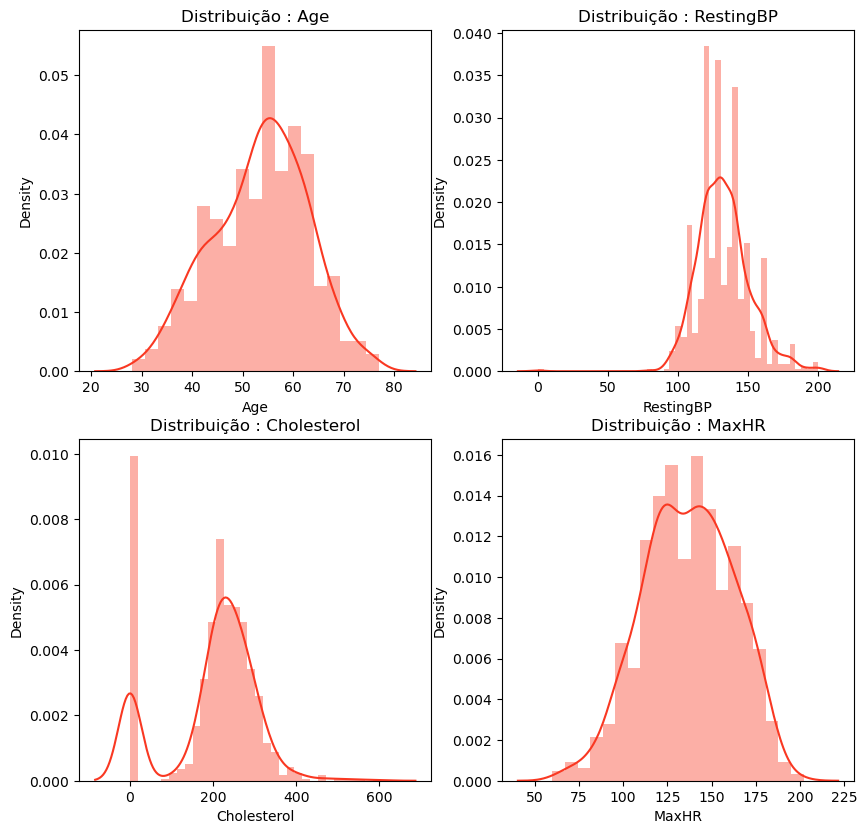

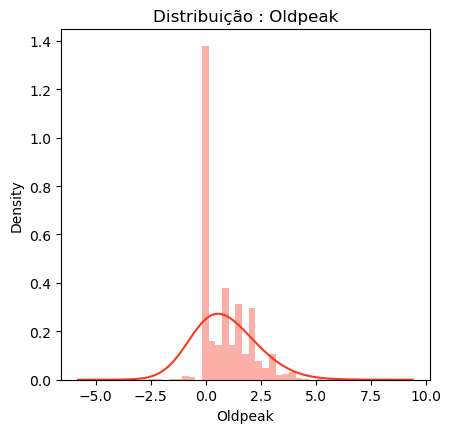

In [48]:
#Distribuição dos Recursos Numéricos

fig, ax = plt.subplots(nrows = 2,ncols = 2,figsize = (10,9.75))
for i in range(len(numerical_features) - 1):
    plt.subplot(2,2,i+1)
    sns.distplot(data[numerical_features[i]],color = colors[0])
    title = 'Distribuição : ' + numerical_features[i]
    plt.title(title)
plt.show()

plt.figure(figsize = (4.75,4.55))
sns.distplot(df1[numerical_features[len(numerical_features) - 1]],kde_kws = {'bw' : 1},color = colors[0])
title = 'Distribuição : ' + numerical_features[len(numerical_features) - 1]
plt.title(title);

A distribuição de dados da Oldpeak é justamente distorcida.
Cholestrol tem uma distribuição de dados bidmodal.

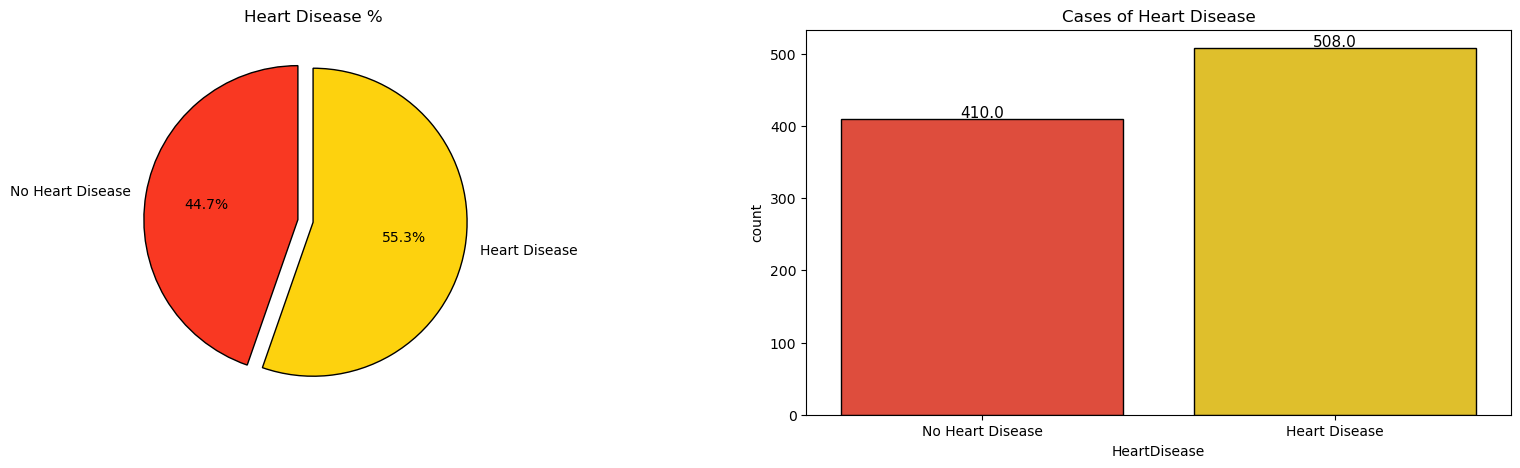

In [57]:
l = list(data['HeartDisease'].value_counts())
circle = [l[1] / sum(l) * 100, l[0] / sum(l) * 100]

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 5))

# Primeiro subplot: Gráfico de pizza mostrando a porcentagem de casos com e sem doenças cardíacas
plt.subplot(1, 2, 1)
plt.pie(circle, labels=['No Heart Disease', 'Heart Disease'], autopct='%1.1f%%', startangle=90,
        explode=(0.1, 0), colors=colors,
        wedgeprops={'edgecolor': 'black', 'linewidth': 1, 'antialiased': True})
plt.title('Heart Disease %')

# Segundo subplot: Countplot mostrando a contagem de casos com e sem doenças cardíacas
plt.subplot(1, 2, 2)
ax = sns.countplot(x='HeartDisease', data=data, palette=colors, edgecolor='black')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, rect.get_height(),
            horizontalalignment='center', fontsize=11)
ax.set_xticklabels(['No Heart Disease', 'Heart Disease'])
plt.title('Cases of Heart Disease')

# Exibição do gráfico
plt.show()


O conjunto de dados é bastante equilibrado!

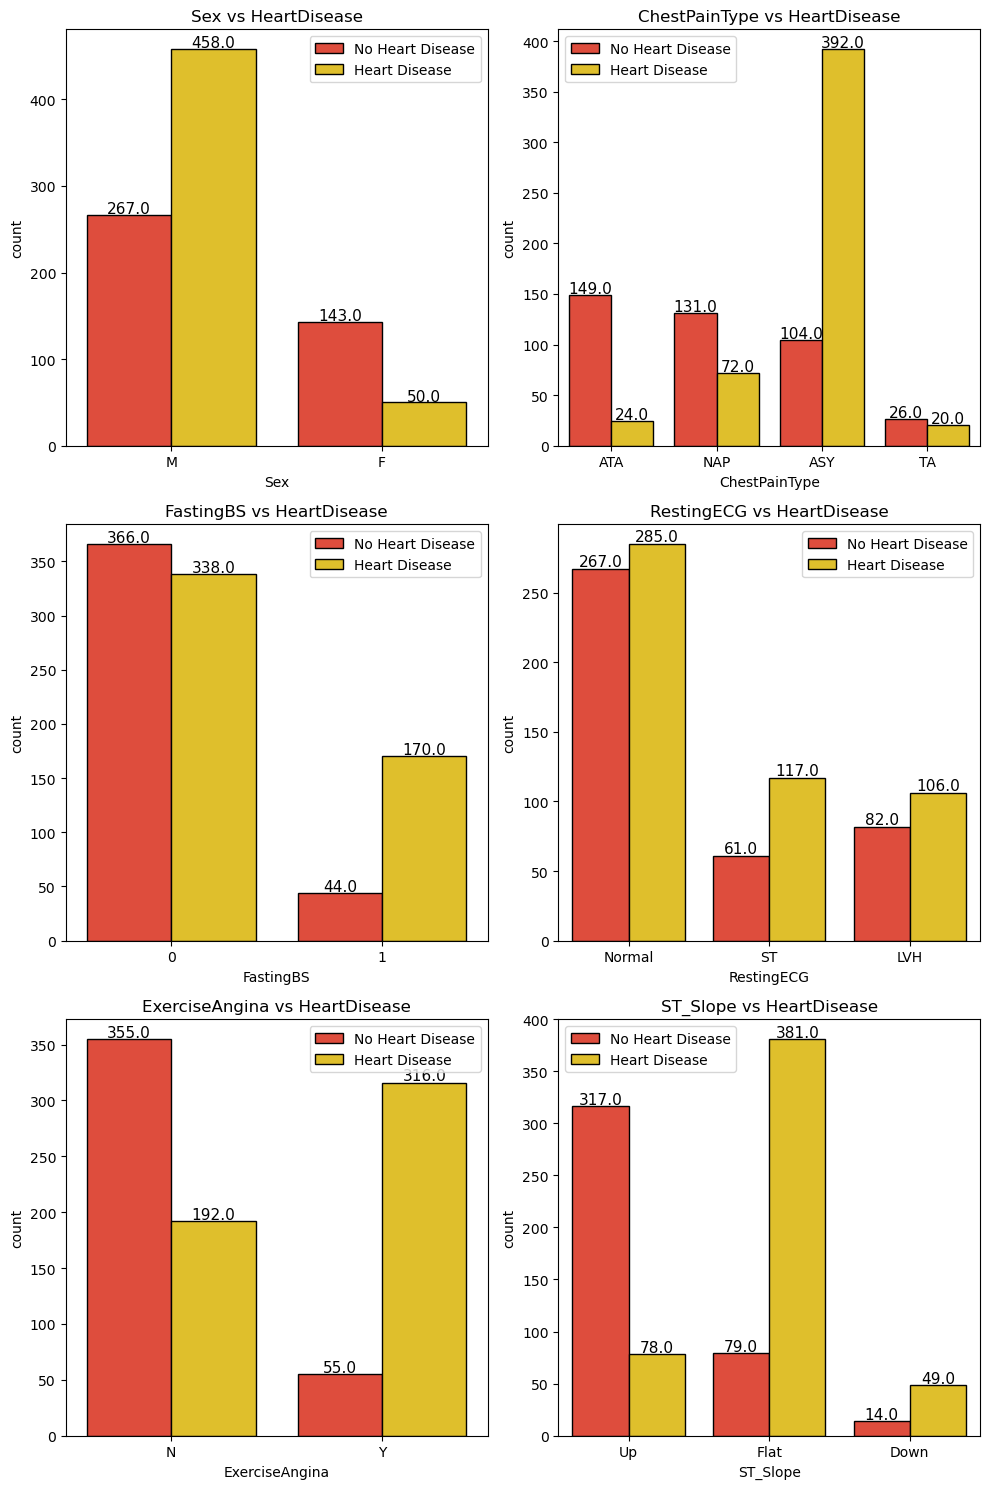

In [70]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(10, 15))  # Mudando de 'ax' para 'axes' para armazenar o array
for i in range(len(categorical_features) - 1):
    row = i // 2  # Determina a linha atual
    col = i % 2   # Determina a coluna atual
    ax = axes[row, col]  # Atribui o eixo correto

    # Criação do gráfico de barras com contagem das categorias e distinção por 'HeartDisease'
    sns.countplot(x=categorical_features[i], data=data, hue="HeartDisease", palette=colors, edgecolor='black', ax=ax)
    
    # Adiciona o valor numérico no topo de cada barra
    for rect in ax.patches:
        ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, rect.get_height(), 
                horizontalalignment='center', fontsize=11)
    
    # Define o título do gráfico
    title = categorical_features[i] + ' vs HeartDisease'
    ax.legend(['No Heart Disease', 'Heart Disease'])  # Corrigido de 'plt.legend' para 'ax.legend'
    ax.set_title(title)

# Ajusta o layout para evitar sobreposição
plt.tight_layout()

# Exibe o gráfico
plt.show()


A população masculina tem mais pacientes com doenças cardíacas do que sem pacientes com doenças cardíacas. No caso da população feminina, os pacientes com doenças cardíacas são menos pacientes do que nenhum paciente com doenças cardíacas.
O tipo de dor no peito ASY aponta corajosamente para grandes chances de doença cardíaca.
Fasting Blood Sugar em jejum é complicado! Pacientes diagnosticados com açúcar no sangue em jejum e sem açúcar no sangue em jejum têm pacientes com doenças cardíacas significativas.
O RestingECG não apresenta uma categoria clara que destaque os pacientes com doenças cardíacas. Todos os 3 valores consistem em um grande número de pacientes com doenças cardíacas.
A Exercise Induced Engina definitivamente aumenta a probabilidade de ser diagnosticado com doenças cardíacas.
Com os valores ST_Slope, a inclinação plana apresenta uma probabilidade muito alta de ser diagnosticado com doença cardíaca. Down também mostra a mesma saída, mas em poucos pontos de dados.

In [75]:
#Características categóricas versus casos positivos de doenças cardíacas
sex = data[data['HeartDisease'] == 1]['Sex'].value_counts()
sex = [sex[0] / sum(sex) * 100, sex[1] / sum(sex) * 100]

cp = data[data['HeartDisease'] == 1]['ChestPainType'].value_counts()
cp = [cp[0] / sum(cp) * 100,cp[1] / sum(cp) * 100,cp[2] / sum(cp) * 100,cp[3] / sum(cp) * 100]

fbs = data[data['HeartDisease'] == 1]['FastingBS'].value_counts()
fbs = [fbs[0] / sum(fbs) * 100,fbs[1] / sum(fbs) * 100]

restecg = data[data['HeartDisease'] == 1]['RestingECG'].value_counts()
restecg = [restecg[0] / sum(restecg) * 100,restecg[1] / sum(restecg) * 100,restecg[2] / sum(restecg) * 100]

exang = data[data['HeartDisease'] == 1]['ExerciseAngina'].value_counts()
exang = [exang[0] / sum(exang) * 100,exang[1] / sum(exang) * 100]

slope = data[data['HeartDisease'] == 1]['ST_Slope'].value_counts()
slope = [slope[0] / sum(slope) * 100,slope[1] / sum(slope) * 100,slope[2] / sum(slope) * 100]

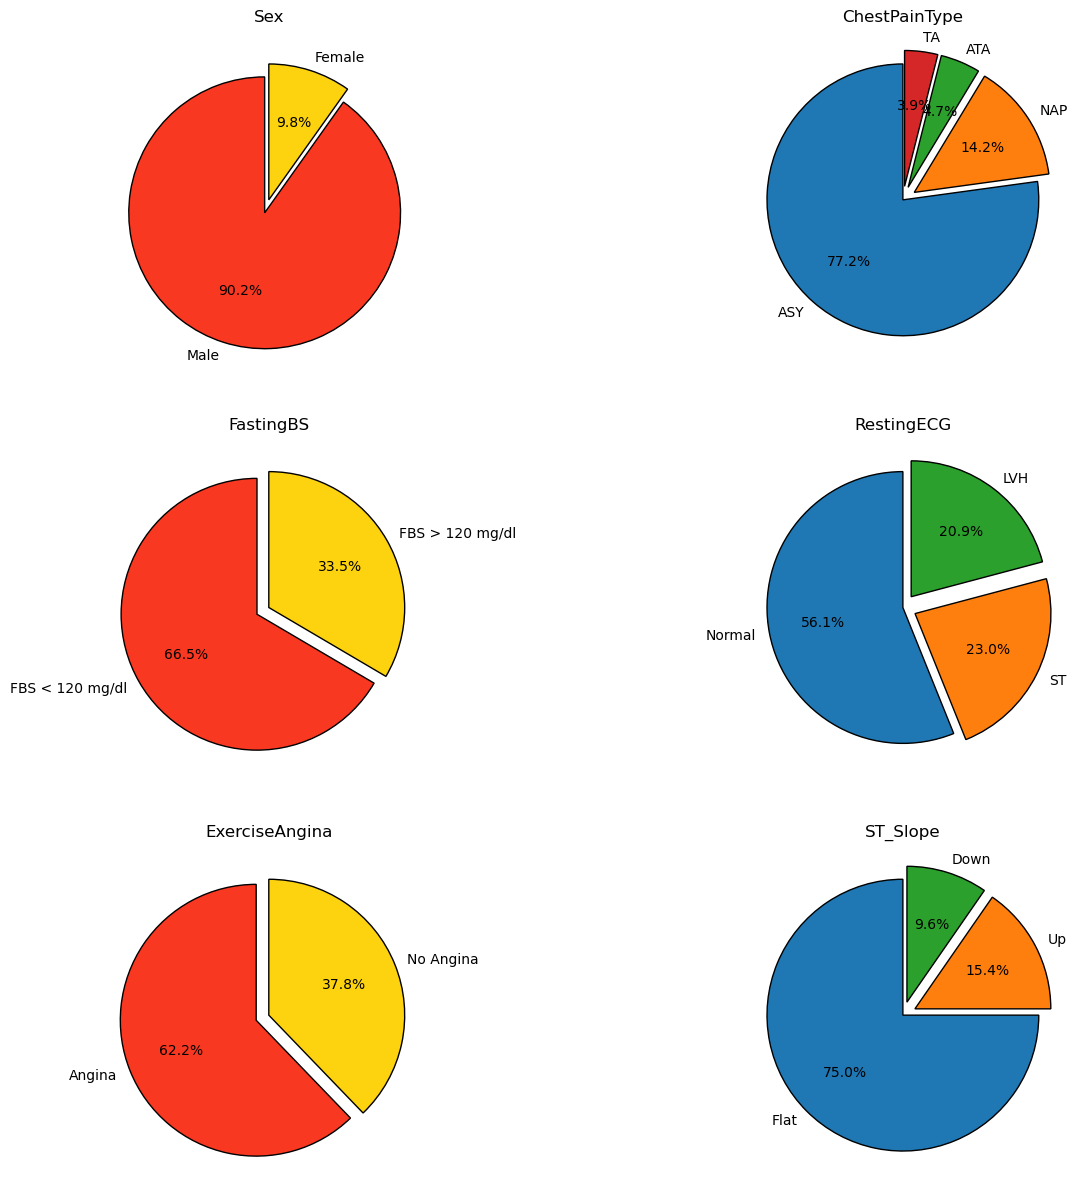

In [77]:
ax,fig = plt.subplots(nrows = 4,ncols = 2,figsize = (15,15))

plt.subplot(3,2,1)
plt.pie(sex,labels = ['Male','Female'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0),colors = colors,
        wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('Sex');

plt.subplot(3,2,2)
plt.pie(cp,labels = ['ASY', 'NAP', 'ATA', 'TA'],autopct='%1.1f%%',startangle = 90,explode = (0,0.1,0.1,0.1),
        wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('ChestPainType');

plt.subplot(3,2,3)
plt.pie(fbs,labels = ['FBS < 120 mg/dl','FBS > 120 mg/dl'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0),colors = colors,
        wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('FastingBS');

plt.subplot(3,2,4)
plt.pie(restecg,labels = ['Normal','ST','LVH'],autopct='%1.1f%%',startangle = 90,explode = (0,0.1,0.1),
        wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('RestingECG');

plt.subplot(3,2,5)
plt.pie(exang,labels = ['Angina','No Angina'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0),colors = colors,
        wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('ExerciseAngina');

plt.subplot(3,2,6)
plt.pie(slope,labels = ['Flat','Up','Down'],autopct='%1.1f%%',startangle = 90,explode = (0,0.1,0.1),
        wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('ST_Slope');

De todos os pacientes com doenças cardíacas, surpreendentes 90% dos pacientes são do sexo masculino.
Quando se trata do tipo de dor no peito, o tipo ASY é a maioria com 77% que leva a doenças cardíacas.
Nível de açúcar no sangue em jejum <120 mg/dl apresenta grandes chances de doenças cardíacas.
Para RestingECG, o nível normal é responsável por 56% de chances de doenças cardíacas do que os níveis de HVE e ST.
A detecção de angina induzida por exercício também aponta para doenças cardíacas.
Quando se trata de leituras ST_Slope, o nível Flat contém uma grande parte com 75% que pode ajudar na detecção de problemas cardíacos subjacentes.

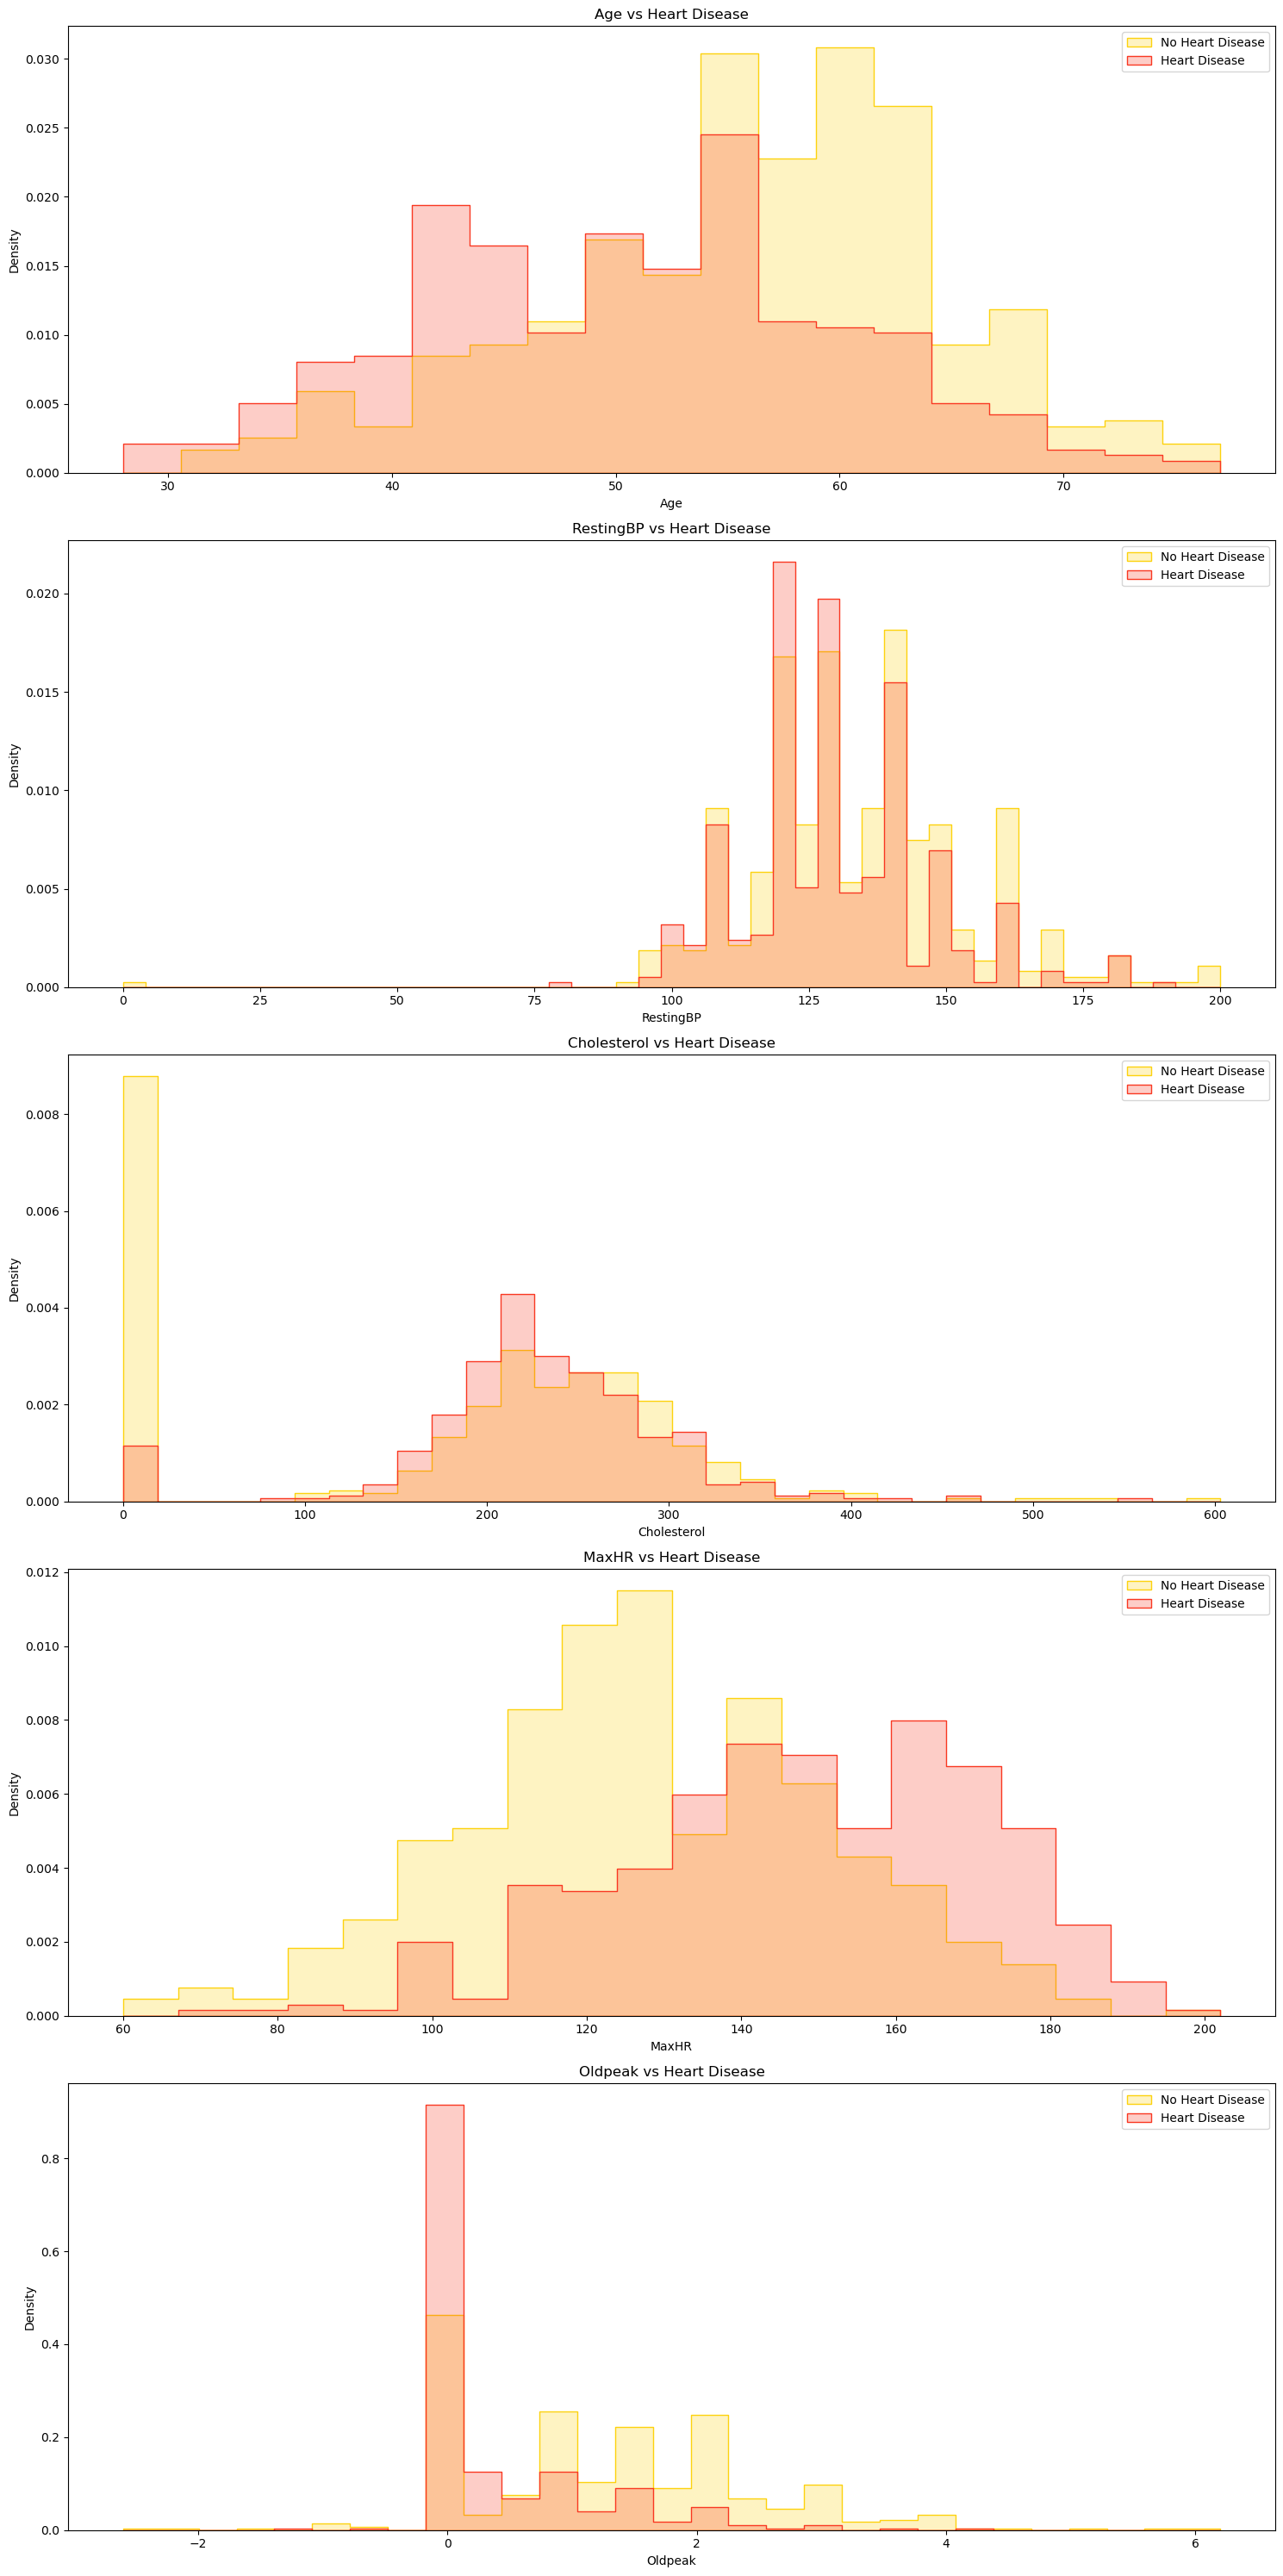

In [82]:
#Numerical Features vs Target Variable (HeartDisease)


# Configuração da paleta de cores
colors = ['#F93822', '#FDD20E']

# Listagem de variáveis numéricas
numerical_features = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']  # Exemplo

# Criação da figura e eixos para subplots
fig, axes = plt.subplots(nrows=5, ncols=1, figsize=(15, 30))

# Plotagem dos histogramas para cada variável numérica
for i in range(len(numerical_features)):
    ax = axes[i]  # Seleciona o eixo correto
    sns.histplot(data=data, x=numerical_features[i], hue="HeartDisease", palette=colors, element="step", stat="density", ax=ax)
    title = numerical_features[i] + ' vs Heart Disease'
    ax.set_title(title)
    ax.legend(['No Heart Disease', 'Heart Disease'])

# Ajusta o layout para evitar sobreposição
plt.tight_layout()

# Exibe o gráfico
plt.show()


Devido a muitos pontos de dados exclusivos nos recursos acima, é difícil obter qualquer tipo de insight.
Assim, converteremos essas características numéricas, exceto a idade, em características categóricas para visualização compreensível e fins de obtenção de insights.
Assim, dimensionamos os valores individuais desses recursos.
Isso traz os diversos pontos de dados para um valor constante que representa um intervalo de valores.
Aqui, dividimos os pontos de dados dos recursos numéricos por 5 ou 10 e atribuímos seu valor de quociente como a constante representativa para esse ponto de dados.
As constantes de escala de 5 e 10 são decididas observando os dados e a intuição.


In [87]:
data['RestingBP_Group'] = [ int(i / 5) for i in data['RestingBP']]
data['Cholesterol_Group'] = [ int(i / 10) for i in data['Cholesterol']]
data['MaxHR_Group'] = [ int(i / 5) for i in data['MaxHR']]
data['Oldpeak_Group'] = [ int( (i*10) / 5) for i in data['Oldpeak']]

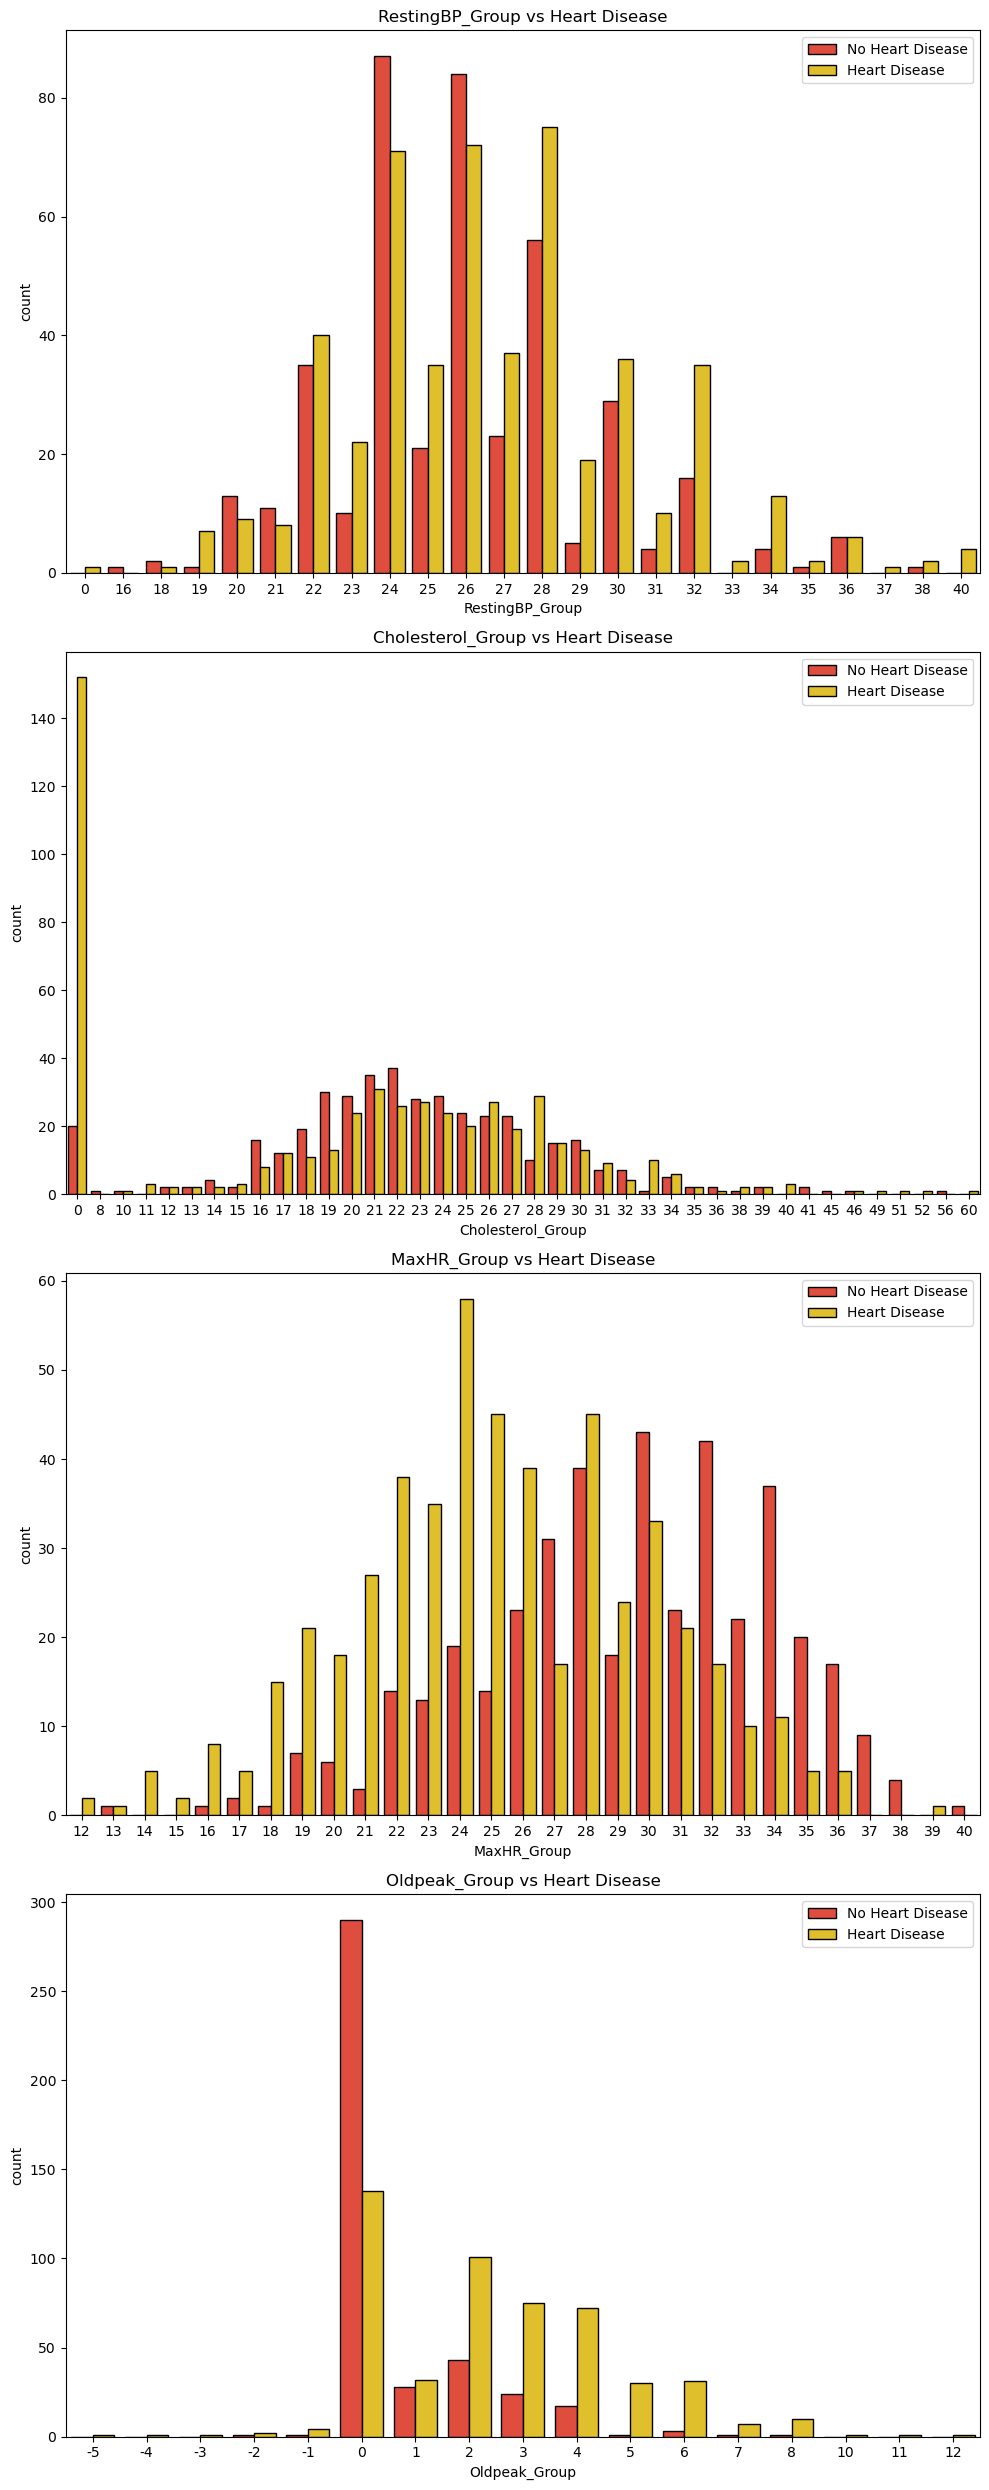

In [91]:

# Configuração da paleta de cores
colors = ['#F93822', '#FDD20E']

# Listagem de variáveis numéricas agrupadas
group_numerical_features = [i + '_Group' for i in numerical_features[1:]]

# Criação da figura e eixos para subplots
fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(10, 25))

# Plotagem dos gráficos para cada variável agrupada
for i in range(len(group_numerical_features)):
    ax = axes[i]  # Seleciona o eixo correto
    sns.countplot(x=group_numerical_features[i], data=data, hue="HeartDisease", palette=colors, edgecolor='black', ax=ax)
    ax.legend(['No Heart Disease', 'Heart Disease'])
    title = group_numerical_features[i] + ' vs Heart Disease'
    ax.set_title(title)

# Ajusta o layout para evitar sobreposição
plt.tight_layout()

# Exibe o gráfico
plt.show()


A partir dos dados do grupo RestingBP, 95 (19x5) - 170 (34x5) leituras são mais propensas a serem detectadas com doenças cardíacas.
Níveis de colesterol entre 160 (16x10) - 340 (34x10) são altamente suscetíveis a doenças cardíacas.
Para as leituras de MaxHR, doenças cardíacas são encontradas em todos os dados, mas os valores 70 (14x5) - 180 (36x5) detectaram muitos casos.
Os valores Oldpeak também mostram doenças cardíacas. Valores de inclinação de 0 (0x5/10) - 4 (8x5/10) apresentam alta probabilidade de diagnóstico de doenças cardíacas.

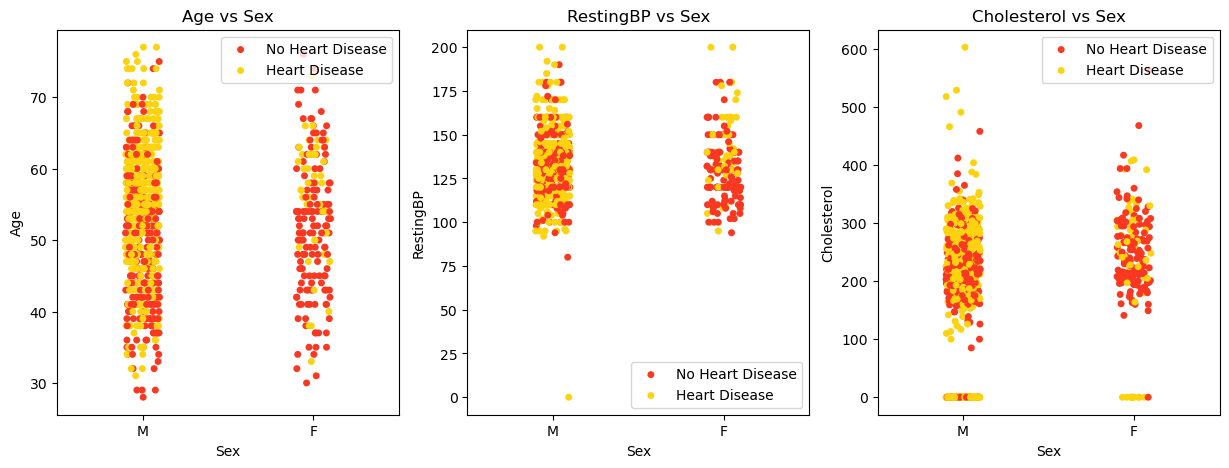

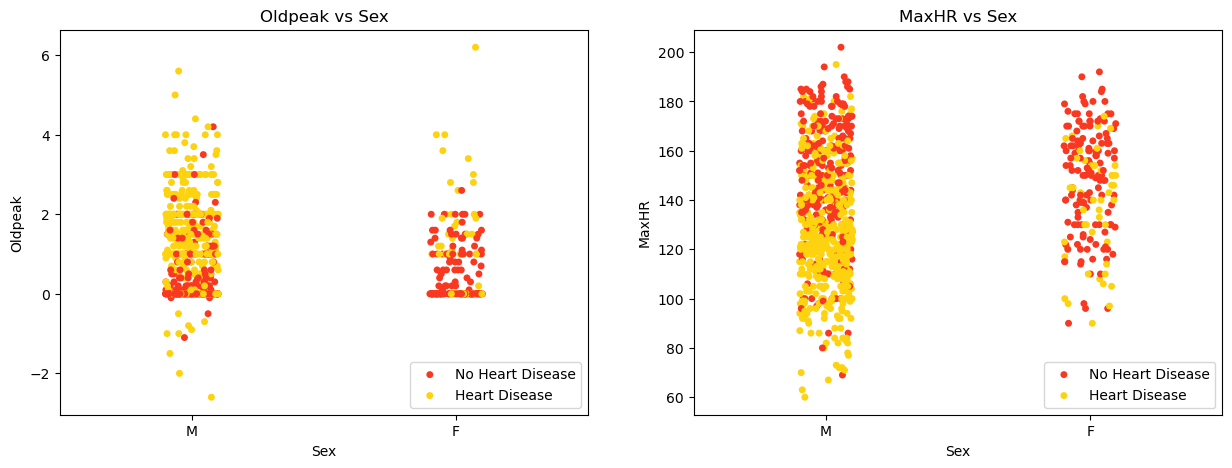

In [96]:
#Numerical features vs Categorical features w.r.t Target variable(HeartDisease)
#Sex vs Numerical Features

fig,ax = plt.subplots(nrows = 1,ncols = 3,figsize = (15,5))
for i in range(3):
    plt.subplot(1,3,i+1)
    sns.stripplot(x = 'Sex',y = numerical_features[i],data = data,hue = 'HeartDisease',palette = colors);
    plt.legend(['No Heart Disease', 'Heart Disease'])
    title = numerical_features[i] + ' vs Sex' 
    plt.title(title);

fig,ax = plt.subplots(nrows = 1,ncols = 2,figsize = (15,5))
for i in [-1,-2]:
    plt.subplot(1,2,-i)
    sns.stripplot(x = 'Sex',y = numerical_features[i],data = data,hue = 'HeartDisease',palette = colors);
    plt.legend(['No Heart Disease', 'Heart Disease'])
    title = numerical_features[i] + ' vs Sex' 
    plt.title(title);

A população masculina apresenta doenças cardíacas em quase todos os valores das características numéricas. Acima dos 50 anos, valores de pico antigos positivos e frequência cardíaca máxima abaixo de 140, as doenças cardíacas na população masculina tornam-se densas.
Os pontos de dados da população feminina são muito menores em comparação com os pontos de dados da população masculina. Assim, não podemos apontar faixas ou valores específicos que exibam casos de doenças cardíacas.

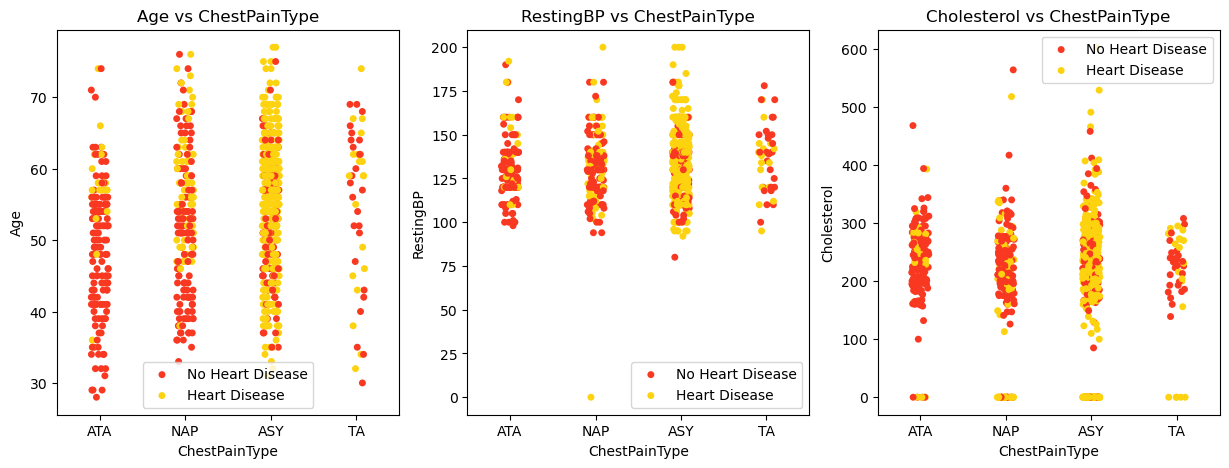

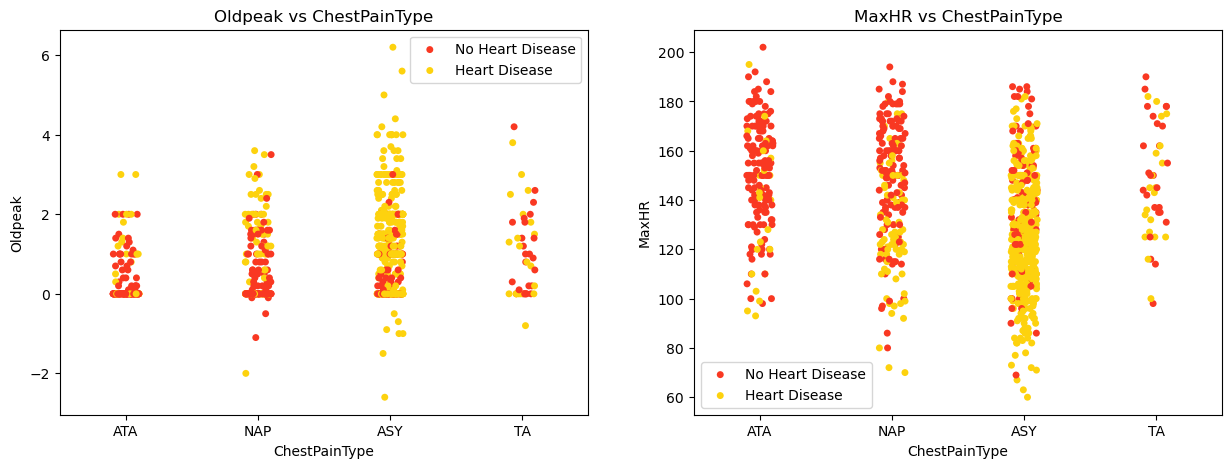

In [99]:
#ChestPainType vs Numerical Features

fig,ax = plt.subplots(nrows = 1,ncols = 3,figsize = (15,5))
for i in range(3):
    plt.subplot(1,3,i+1)
    sns.stripplot(x = 'ChestPainType',y = numerical_features[i],data = data,hue = 'HeartDisease',palette = colors);
    plt.legend(['No Heart Disease', 'Heart Disease'])
    title = numerical_features[i] + ' vs ChestPainType'
    plt.title(title);

fig,ax = plt.subplots(nrows = 1,ncols = 2,figsize = (15,5))
for i in [-1,-2]:
    plt.subplot(1,2,-i)
    sns.stripplot(x = 'ChestPainType',y = numerical_features[i],data = data,hue = 'HeartDisease',palette = colors);
    plt.legend(['No Heart Disease', 'Heart Disease'])
    title = numerical_features[i] + ' vs ChestPainType' 
    plt.title(title);

O tipo de dor no peito ASY domina muito outros tipos de dor no peito em todas as características numéricas.

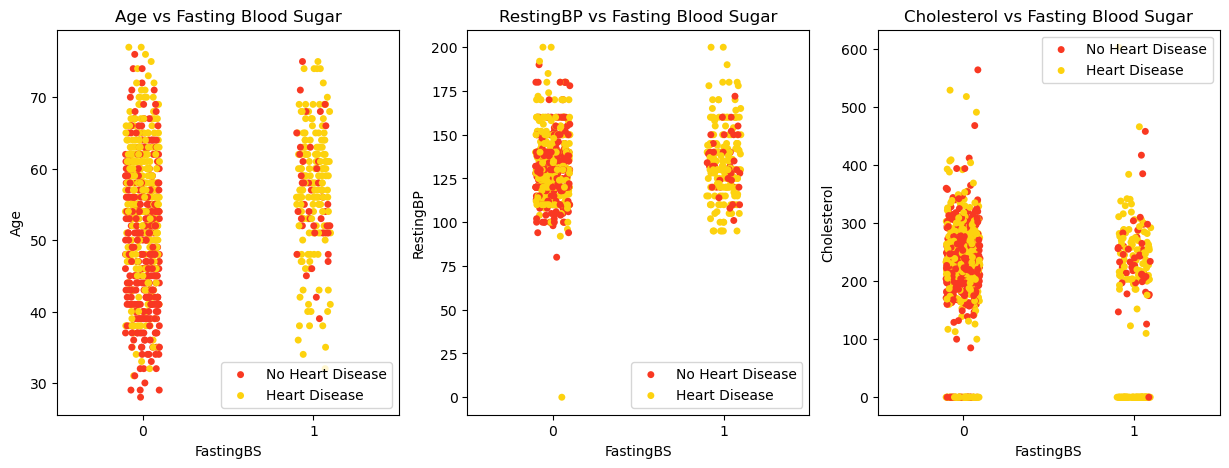

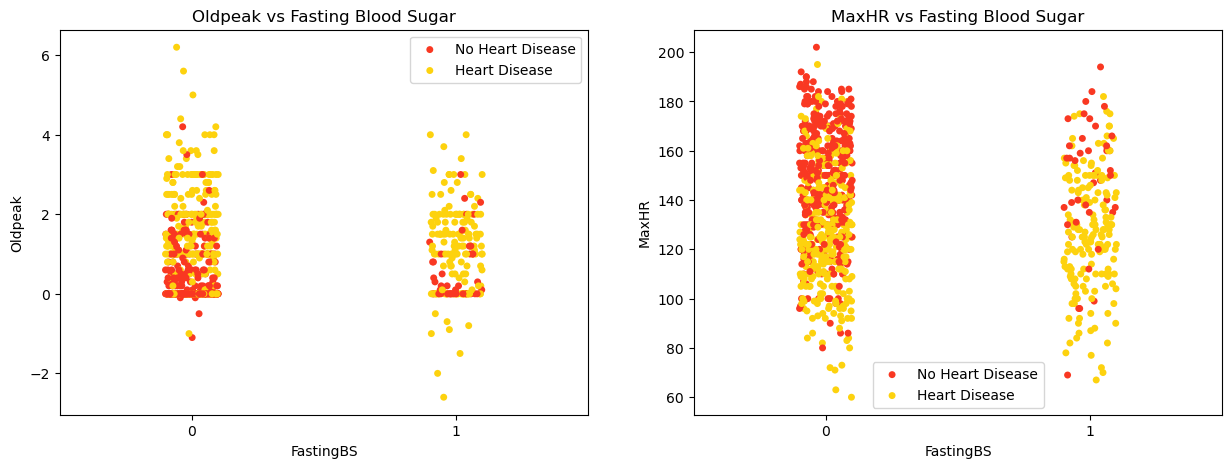

In [102]:
fig,ax = plt.subplots(nrows = 1,ncols = 3,figsize = (15,5))
for i in range(3):
    plt.subplot(1,3,i+1)
    sns.stripplot(x = 'FastingBS',y = numerical_features[i],data = data,hue = 'HeartDisease',palette = colors);
    plt.legend(['No Heart Disease', 'Heart Disease'])
    title = numerical_features[i] + ' vs Fasting Blood Sugar' 
    plt.title(title);

fig,ax = plt.subplots(nrows = 1,ncols = 2,figsize = (15,5))
for i in [-1,-2]:
    plt.subplot(1,2,-i)
    sns.stripplot(x = 'FastingBS',y = numerical_features[i],data = data,hue = 'HeartDisease',palette = colors);
    plt.legend(['No Heart Disease', 'Heart Disease'])
    title = numerical_features[i] + ' vs Fasting Blood Sugar' 
    plt.title(title);

Acima dos 50 anos, as doenças cardíacas são encontradas em todos os dados, independentemente de o paciente ter sido diagnosticado com açúcar no sangue em jejum ou não.
Açúcar no sangue em jejum com pressão arterial em repouso acima de 100 apresentou mais casos de doenças cardíacas do que pacientes sem açúcar no sangue em jejum.
O colesterol com açúcar no sangue em jejum não parece ter efeito na compreensão da razão por trás das doenças cardíacas.
Pacientes que não foram considerados positivos com açúcar no sangue em jejum, mas têm frequência cardíaca máxima abaixo de 130, são mais propensos a doenças cardíacas.

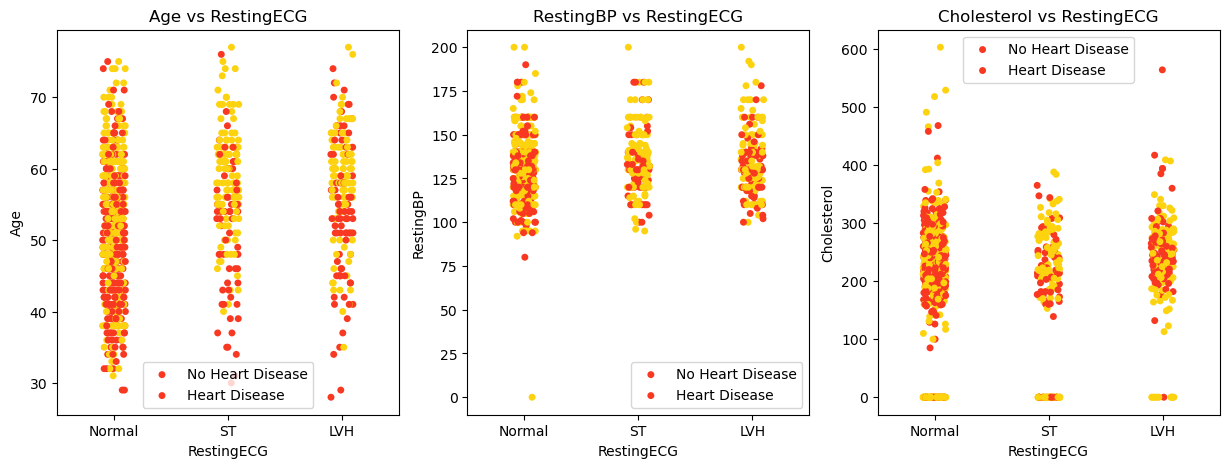

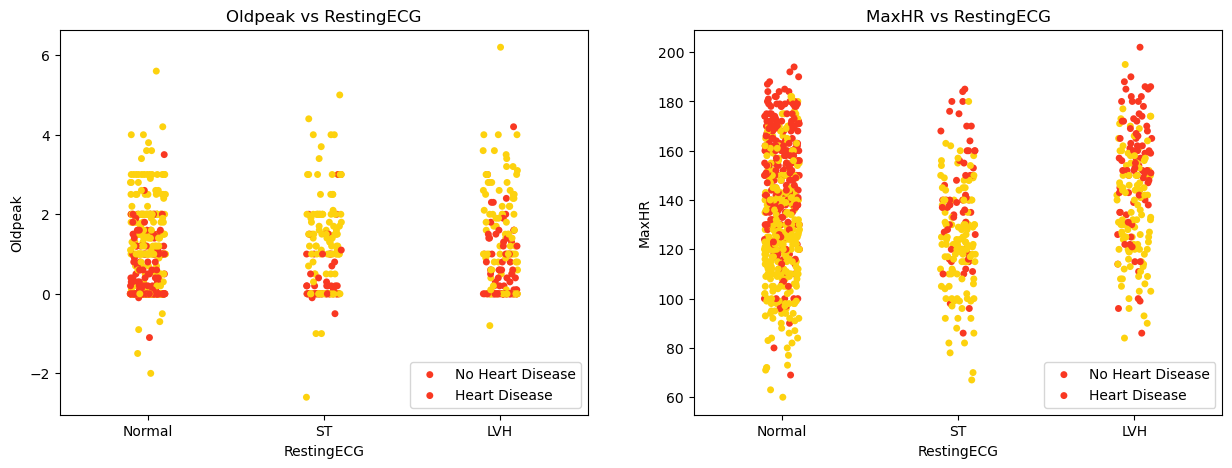

In [105]:
#RestingECG vs Numerical Features

fig,ax = plt.subplots(nrows = 1,ncols = 3,figsize = (15,5))
for i in range(3):
    plt.subplot(1,3,i+1)
    sns.stripplot(x = 'RestingECG',y = numerical_features[i],data = data,hue = 'HeartDisease',palette = colors);
    plt.legend(['No Heart Disease', 'Heart Disease'])
    title = numerical_features[i] + ' vs RestingECG' 
    plt.title(title);

fig,ax = plt.subplots(nrows = 1,ncols = 2,figsize = (15,5))
for i in [-1,-2]:
    plt.subplot(1,2,-i)
    sns.stripplot(x = 'RestingECG',y = numerical_features[i],data = data,hue = 'HeartDisease',palette = colors);
    plt.legend(['No Heart Disease', 'Heart Disease'])
    title = numerical_features[i] + ' vs RestingECG'
    plt.title(title);

Doenças cardíacas com valores de RestingECG de Normal, ST e HVE são detectadas a partir de 30,40 e 40, respectivamente. Pacientes com mais de 50 anos são mais propensos do que qualquer outra idade, independentemente dos valores do ECG em repouso.
As doenças cardíacas são encontradas consistentemente em todos os valores de RestingBP e RestingECG.
Valores de colesterol entre 200 - 300 juntamente com o valor ST do RestingECG exibem uma amostra de pacientes que sofrem de doenças cardíacas.
Para valores máximos de Frequência Cardíaca, as doenças cardíacas são detectadas em densidade abaixo de 140 pontos e ECG de repouso normal. ST e HVE ao longo dos valores de frequência cardíaca máxima exibem casos de doenças cardíacas.

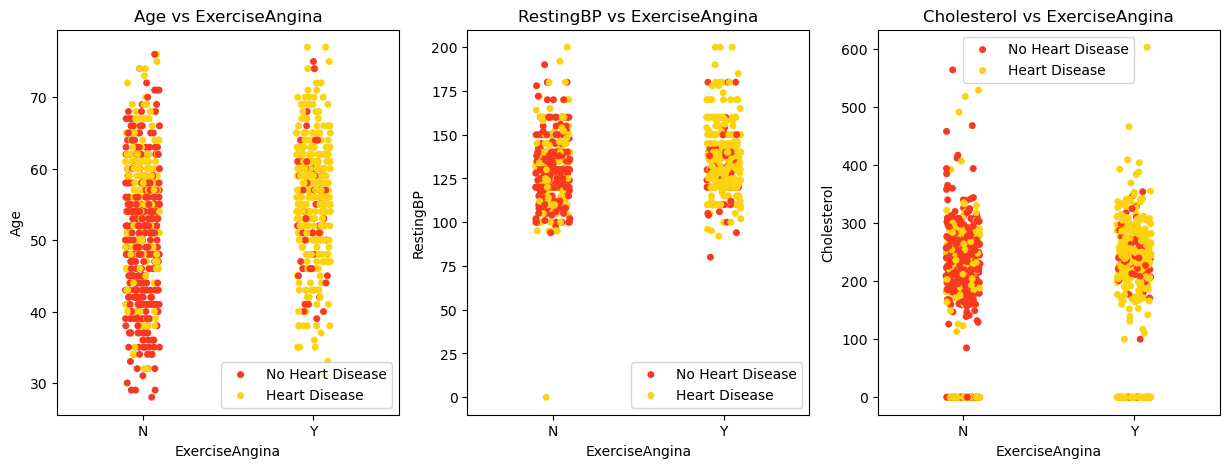

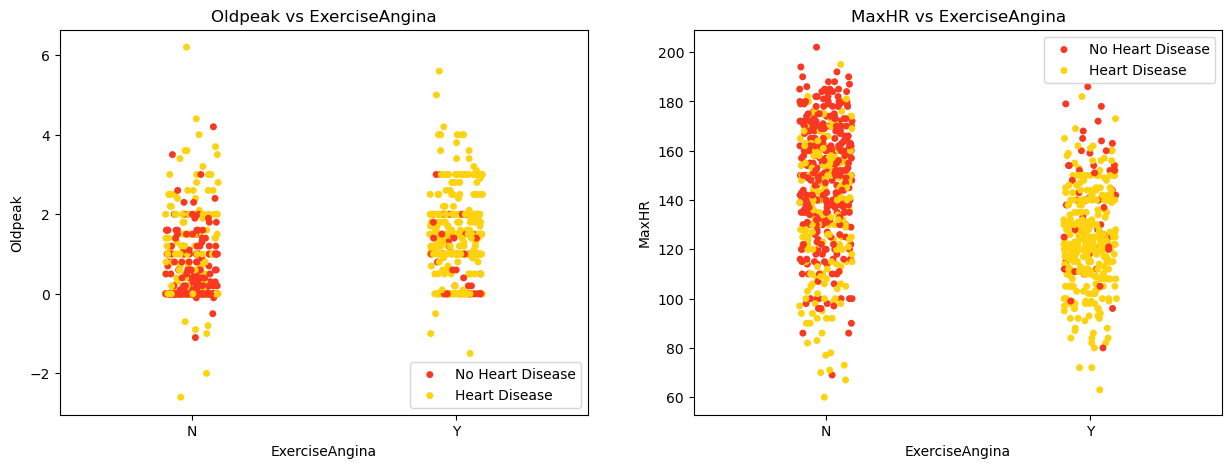

In [110]:
#ExerciseAngina vs Numerical Features

fig,ax = plt.subplots(nrows = 1,ncols = 3,figsize = (15,5))
for i in range(3):
    plt.subplot(1,3,i+1)
    sns.stripplot(x = 'ExerciseAngina',y = numerical_features[i],data = data,hue = 'HeartDisease',palette = colors);
    plt.legend(['No Heart Disease', 'Heart Disease'])
    title = numerical_features[i] + ' vs ExerciseAngina'
    plt.title(title);

fig,ax = plt.subplots(nrows = 1,ncols = 2,figsize = (15,5))
for i in [-1,-2]:
    plt.subplot(1,2,-i)
    sns.stripplot(x = 'ExerciseAngina',y = numerical_features[i],data = data,hue = 'HeartDisease',palette = colors);
    plt.legend(['No Heart Disease', 'Heart Disease'])
    title = numerical_features[i] + ' vs ExerciseAngina' 
    plt.title(title);

Uma observação muito clara pode ser feita sobre a relação entre casos de doenças cardíacas e angina induzida por exercício. Uma correlação positiva entre as 2 características pode ser concluída em todas as características numéricas.

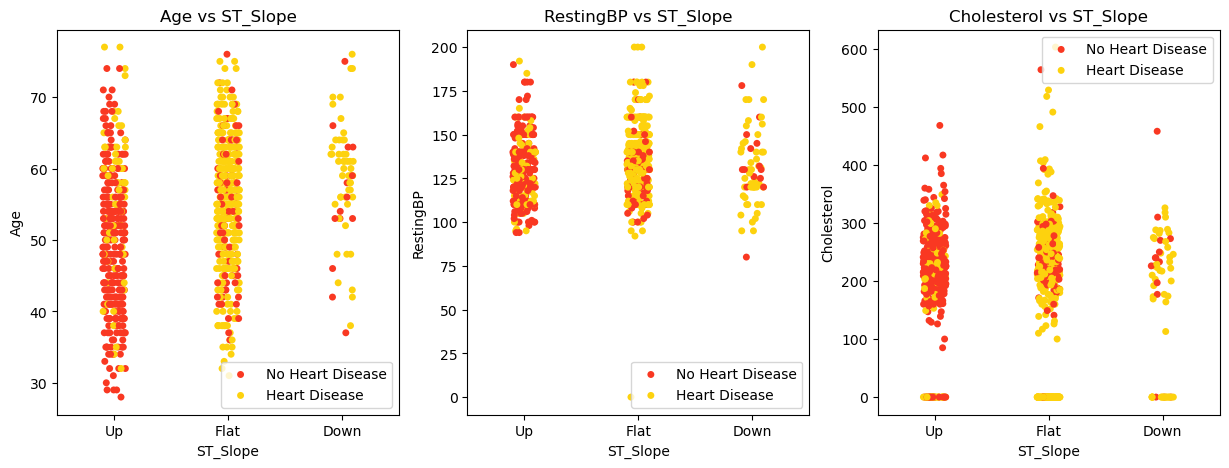

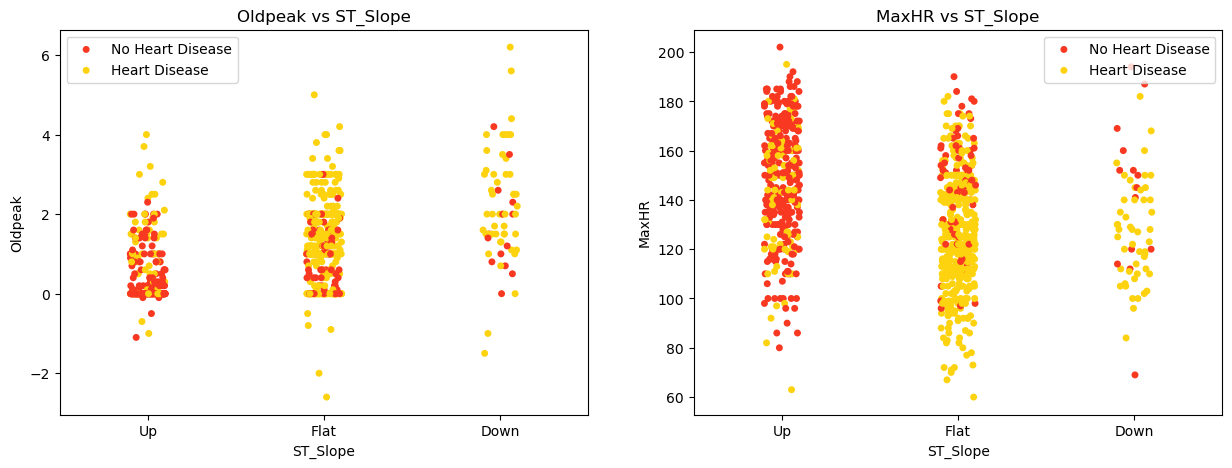

In [113]:
#ST_Slope vs Numerical Features :

fig,ax = plt.subplots(nrows = 1,ncols = 3,figsize = (15,5))
for i in range(3):
    plt.subplot(1,3,i+1)
    sns.stripplot(x = 'ST_Slope',y = numerical_features[i],data = data,hue = 'HeartDisease',palette = colors);
    plt.legend(['No Heart Disease', 'Heart Disease'])
    title = numerical_features[i] + ' vs ST_Slope' 
    plt.title(title);

fig,ax = plt.subplots(nrows = 1,ncols = 2,figsize = (15,5))
for i in [-1,-2]:
    plt.subplot(1,2,-i)
    sns.stripplot(x = 'ST_Slope',y = numerical_features[i],data = data,hue = 'HeartDisease',palette = colors);
    plt.legend(['No Heart Disease', 'Heart Disease'])
    title = numerical_features[i] + ' vs ST_Slope'
    plt.title(title);

Outra observação positiva cristalina pode ser feita sobre a correlação positiva entre o valor ST_Slope e os casos de doenças cardíacas.
Flat, Down e Up, nessa ordem, exibem probabilidade alta, média e baixa de ser diagnosticado com doenças cardíacas, respectivamente.

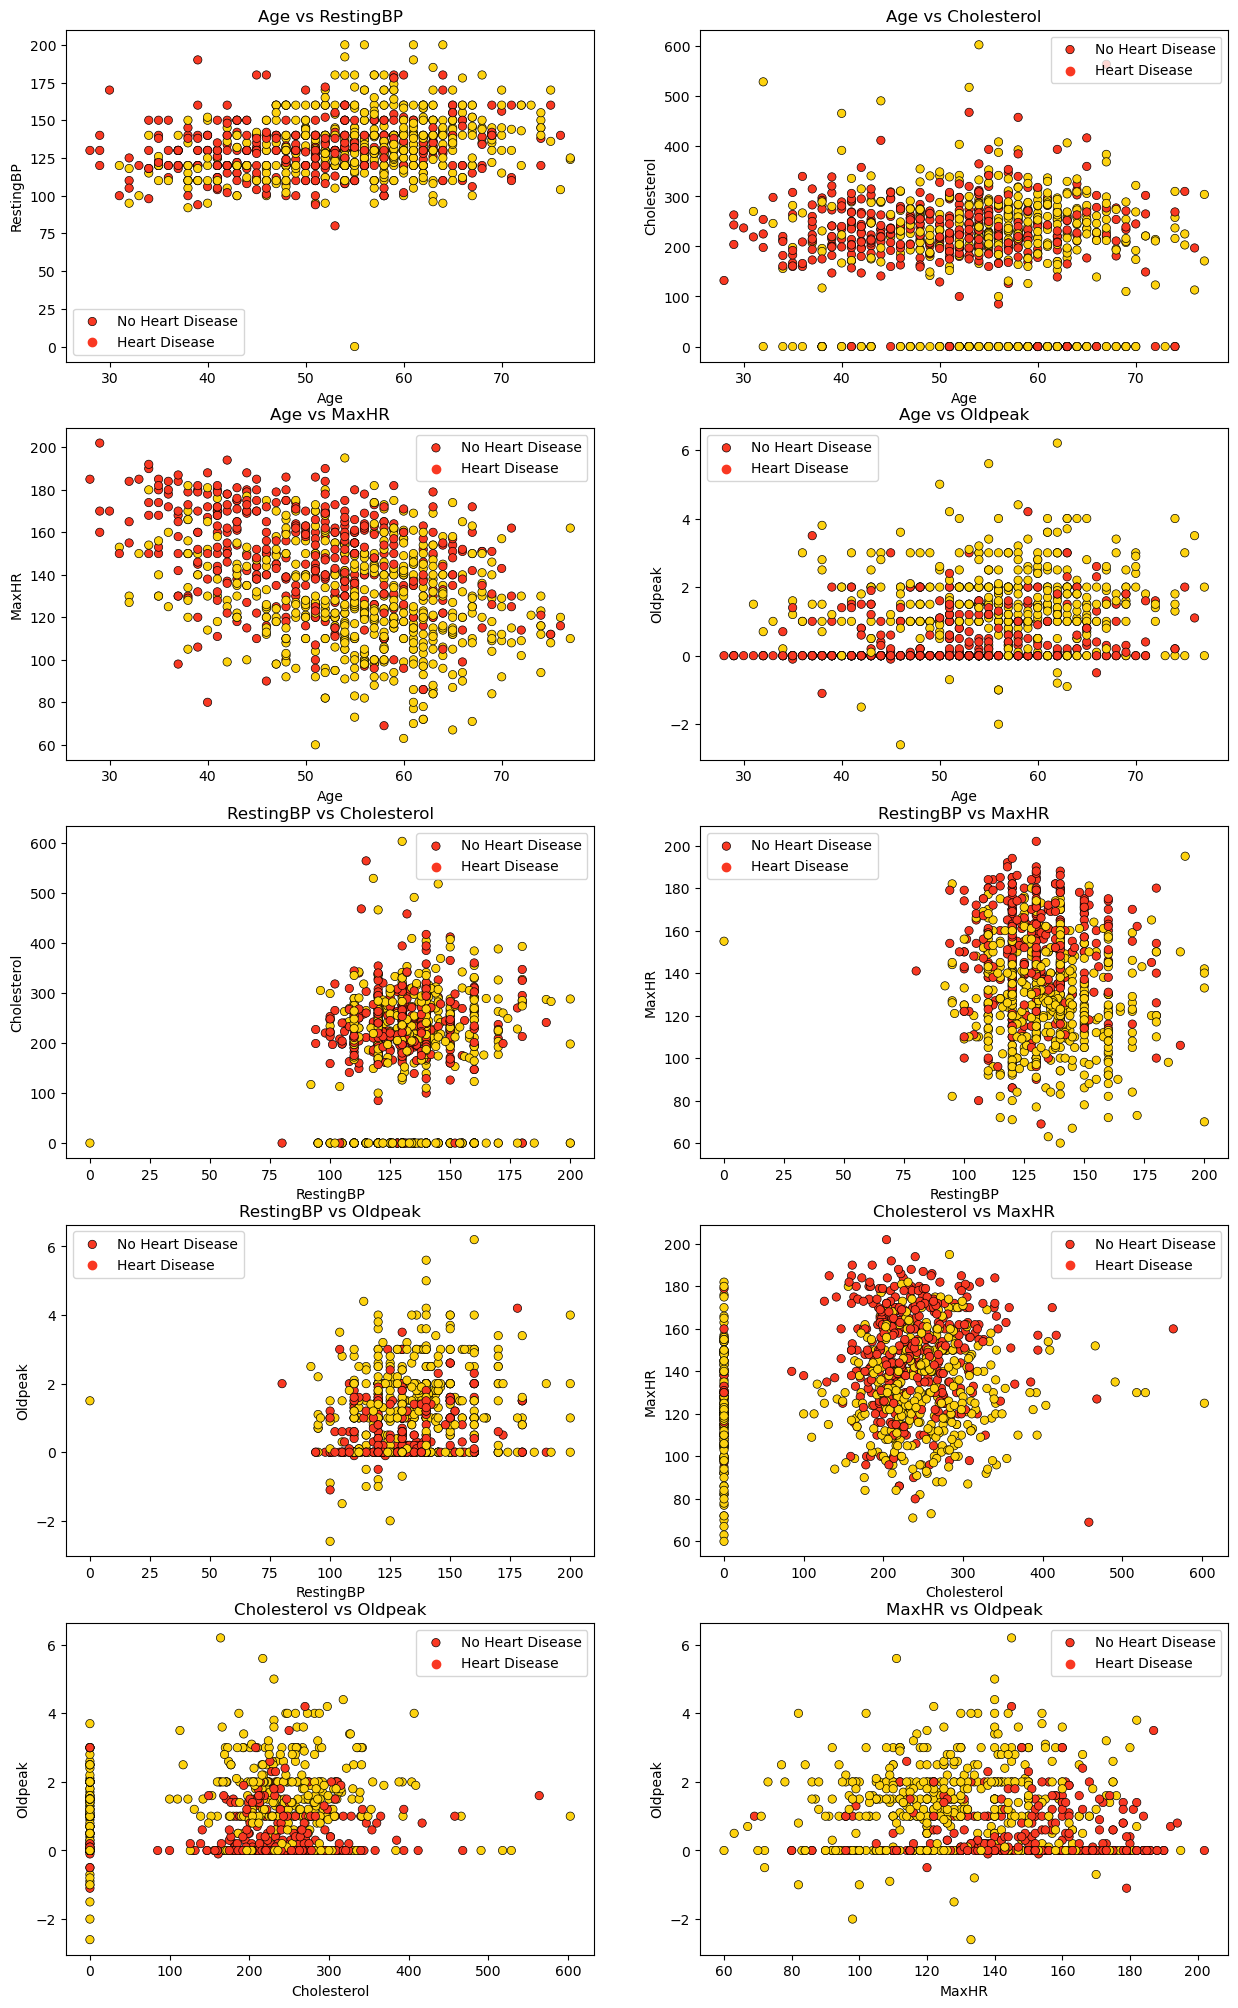

In [116]:
#Numerical features vs Numerical features w.r.t Target variable(HeartDisease)

a = 0
fig,ax = plt.subplots(nrows = 5,ncols = 2,figsize = (15,25))
for i in range(len(numerical_features)):
    for j in range(len(numerical_features)):
        if i != j and j > i:
            a += 1
            plt.subplot(5,2,a)
            sns.scatterplot(x = numerical_features[i],y = numerical_features[j],data = data,hue = 'HeartDisease',palette = colors, edgecolor = 'black');
            plt.legend(['No Heart Disease', 'Heart Disease'])
            title = numerical_features[i] + ' vs ' + numerical_features[j]
            plt.title(title)

#Para maiores de 50 anos, PA em repouso entre 100 - 175, nível de colesterol de 200 - 300, frequência cardíaca máxima abaixo de 160 e valores de pico antigos positivos apresentam altos casos de doenças cardíacas.
Para valores de PA em repouso entre 100 e 175, destaca muitos pacientes com doenças cardíacas para todos os recursos.
Valores de colesterol entre 200 e 300 dominam os casos de doenças cardíacas.
Da mesma forma, valores de Frequência Cardíaca Máxima abaixo de 140 apresentam alta probabilidade de serem diagnosticados com doenças cardíacas.

Ordem/Valores de características para casos positivos de cardiopatia :
Categorical Features (Order) :

Sex : Male > Female
ChestPainType : ASY > NAP > ATA > TA
FastingBS : ( FBS < 120 mg/dl ) > ( FBS > 120 mg/dl)
RestingECG : Normal > ST > LVH
ExerciseAngina : Angina > No Angina
ST_Slope : Flat > Up > Down
Numerical Features (Range) :

Age : 50+
RestingBP : 95 - 170
Cholesterol : 160 - 340
MaxHR : 70 - 180
Oldpeak : 0 - 4

In [120]:
#Data Scaling
from sklearn.preprocessing import MinMaxScaler,StandardScaler
mms = MinMaxScaler() # Normalization
ss = StandardScaler() # Standardization

df1['Oldpeak'] = mms.fit_transform(df1[['Oldpeak']])
df1['Age'] = ss.fit_transform(df1[['Age']])
df1['RestingBP'] = ss.fit_transform(df1[['RestingBP']])
df1['Cholesterol'] = ss.fit_transform(df1[['Cholesterol']])
df1['MaxHR'] = ss.fit_transform(df1[['MaxHR']])
df1.head()

Age  Sex  ChestPainType  RestingBP  Cholesterol  FastingBS  RestingECG  \
0 -1.43    1              1       0.41         0.83          0           1   
1 -0.48    0              2       1.49        -0.17          0           1   
2 -1.75    1              1      -0.13         0.77          0           2   
3 -0.58    0              0       0.30         0.14          0           1   
4  0.05    1              2       0.95        -0.03          0           1   

   MaxHR  ExerciseAngina  Oldpeak  ST_Slope  HeartDisease  
0   1.38               0     0.30         2             0  
1   0.75               0     0.41         1             1  
2  -1.53               0     0.30         2             0  
3  -1.13               1     0.47         1             1  
4  -0.58               0     0.30         2             0

O modelo de aprendizado de máquina não entende as unidades dos valores dos recursos. Ele trata a entrada apenas como um simples número, mas não entende o verdadeiro significado desse valor. Assim, torna-se necessário dimensionar os dados.
Ex: Idade = Anos; JejumBS = mg/dl

Temos 2 opções para escalonamento de dados: 1) Normalização 2) Padronização. Como a maioria dos algoritmos assume que os dados são normalmente distribuídos (Gaussianos), a normalização é feita para recursos cujos dados não apresentam distribuição normal e a padronização é realizada para recursos que são normalmente distribuídos onde seus valores são enormes ou muito pequenos em comparação com outros recursos.
Normalização: o recurso Oldpeak é normalizado, pois exibiu uma distribuição de dados distorcida à direita.
Padronização: os recursos Idade, PA em repouso, Colesterol e FCMáx são reduzidos porque esses recursos são normalmente distribuídos.

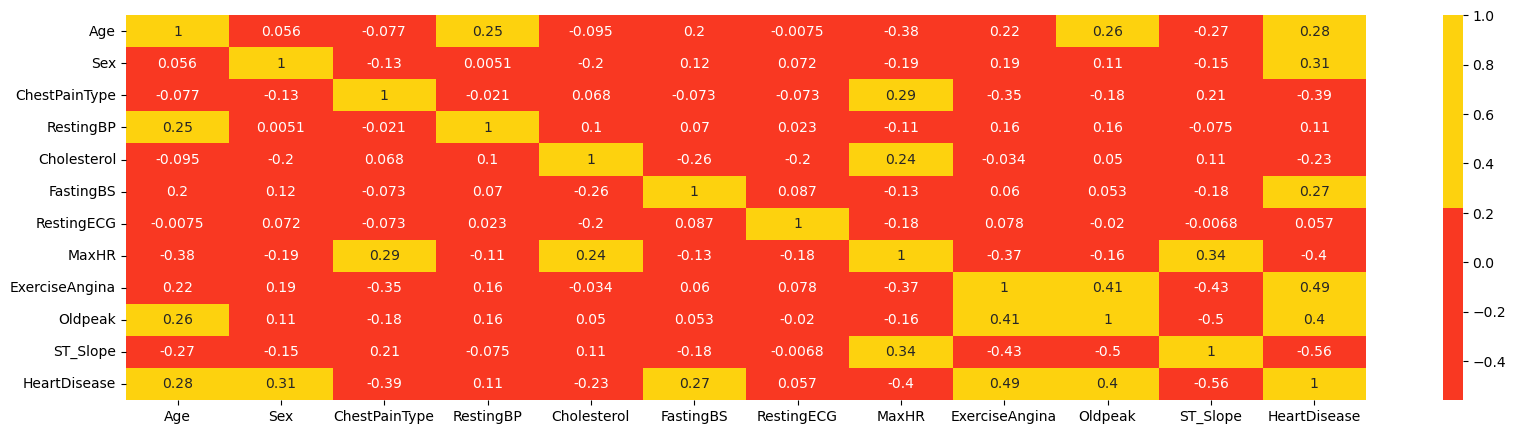

In [123]:
#Matriz de Correlação

plt.figure(figsize = (20,5))
sns.heatmap(df1.corr(),cmap = colors,annot = True);

É uma matriz enorme com muitos recursos. Verificaremos a correlação apenas em relação à HeartDisease.

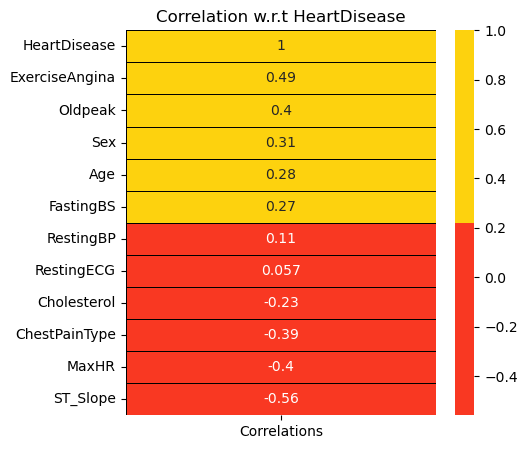

In [126]:
corr = df1.corrwith(df1['HeartDisease']).sort_values(ascending = False).to_frame()
corr.columns = ['Correlations']
plt.subplots(figsize = (5,5))
sns.heatmap(corr,annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black');
plt.title('Correlation w.r.t HeartDisease');

Exceto RestingBP e RestingECG, todos apresentam uma relação positiva ou negativa com HeartDisease.

In [133]:
#Feature Selection for Categorical Features 

#Chi Squared Test :
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2


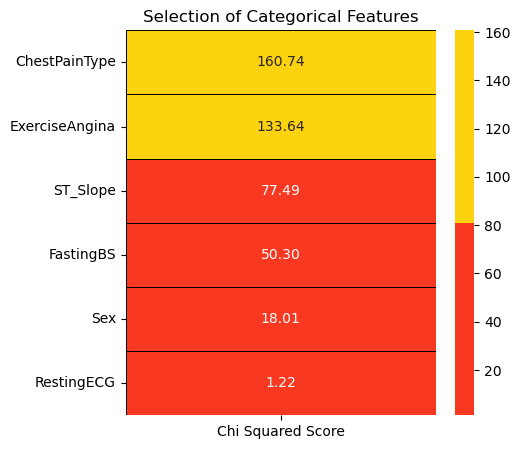

In [135]:
features = df1.loc[:,categorical_features[:-1]]
target = df1.loc[:,categorical_features[-1]]

best_features = SelectKBest(score_func = chi2,k = 'all')
fit = best_features.fit(features,target)

featureScores = pd.DataFrame(data = fit.scores_,index = list(features.columns),columns = ['Chi Squared Score']) 

plt.subplots(figsize = (5,5))
sns.heatmap(featureScores.sort_values(ascending = False,by = 'Chi Squared Score'),annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black',fmt = '.2f');
plt.title('Selection of Categorical Features');

Exceto o RestingECG, todas as características categóricas restantes são muito importantes para prever doenças cardíacas.

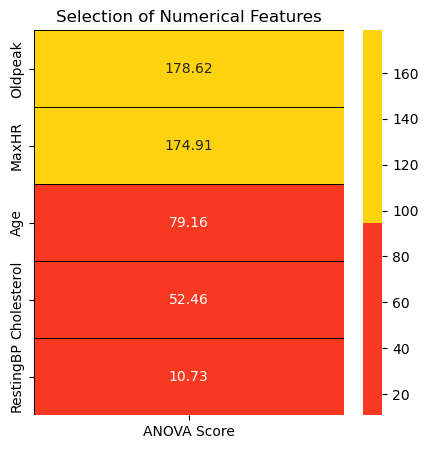

In [138]:
#Feature Selection for Numerical Features :¶
#ANOVA Test :

from sklearn.feature_selection import f_classif

features = df1.loc[:,numerical_features]
target = df1.loc[:,categorical_features[-1]]

best_features = SelectKBest(score_func = f_classif,k = 'all')
fit = best_features.fit(features,target)

featureScores = pd.DataFrame(data = fit.scores_,index = list(features.columns),columns = ['ANOVA Score']) 

plt.subplots(figsize = (5,5))
sns.heatmap(featureScores.sort_values(ascending = False,by = 'ANOVA Score'),annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black',fmt = '.2f');
plt.title('Selection of Numerical Features');

Deixaremos o RestingBP de fora da parte de modelagem e pegaremos os recursos restantes

In [144]:
#Modelando

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import RocCurveDisplay
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import precision_recall_curve

In [146]:
features = df1[df1.columns.drop(['HeartDisease','RestingBP','RestingECG'])].values
target = df1['HeartDisease'].values
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size = 0.20, random_state = 2)

Selecionando os recursos dos testes realizados acima e dividindo os dados em 80 a 20 grupos de teste de treinamento.

In [167]:
def model(classifier):
    
    classifier.fit(x_train, y_train)
    prediction = classifier.predict(x_test)
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    print("Accuracy : ",'{0:.2%}'.format(accuracy_score(y_test, prediction)))
    print("Cross Validation Score : ",'{0:.2%}'.format(cross_val_score(classifier, x_train, y_train, cv=cv, scoring='roc_auc').mean()))
    print("ROC_AUC Score : ",'{0:.2%}'.format(roc_auc_score(y_test, prediction)))
    # plot_roc_curve(classifier, x_test, y_test)  # Esta linha foi removida
    # plt.title('ROC_AUC_Plot')
    # plt.show()

def model_evaluation(classifier):
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, classifier.predict(x_test))
    names = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
    counts = [value for value in cm.flatten()]
    percentages = ['{0:.2%}'.format(value) for value in cm.flatten() / np.sum(cm)]
    labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(names, counts, percentages)]
    labels = np.asarray(labels).reshape(2, 2)
    sns.heatmap(cm, annot=labels, cmap='Blues', fmt='')
    plt.title('Confusion Matrix')
    plt.show()
    
    # Classification Report
    print(classification_report(y_test, classifier.predict(x_test)))


In [153]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression

In [155]:
classifier_lr = LogisticRegression(random_state = 0,C=10,penalty= 'l2') 

In [169]:
model(classifier_lr)

Accuracy :  87.50%
Cross Validation Score :  91.12%
ROC_AUC Score :  87.43%


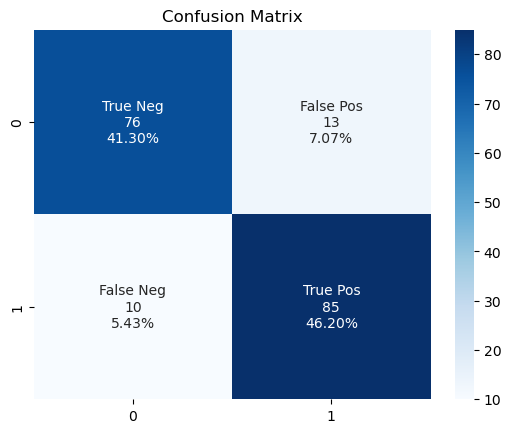

              precision    recall  f1-score   support

           0       0.88      0.85      0.87        89
           1       0.87      0.89      0.88        95

    accuracy                           0.88       184
   macro avg       0.88      0.87      0.87       184
weighted avg       0.88      0.88      0.87       184



In [171]:
model_evaluation(classifier_lr)

In [175]:
#Support Vector Classifier
from sklearn.svm import SVC

In [177]:
classifier_svc = SVC(kernel = 'linear',C = 0.1)

In [179]:
model(classifier_svc)

Accuracy :  87.50%
Cross Validation Score :  90.53%
ROC_AUC Score :  87.43%


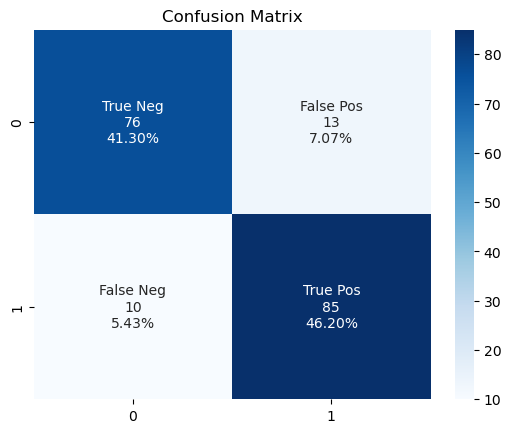

              precision    recall  f1-score   support

           0       0.88      0.85      0.87        89
           1       0.87      0.89      0.88        95

    accuracy                           0.88       184
   macro avg       0.88      0.87      0.87       184
weighted avg       0.88      0.88      0.87       184



In [181]:
model_evaluation(classifier_svc)

In [185]:
#Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

In [187]:
classifier_dt = DecisionTreeClassifier(random_state = 1000,max_depth = 4,min_samples_leaf = 1)

In [189]:
model(classifier_dt)

Accuracy :  84.78%
Cross Validation Score :  89.09%
ROC_AUC Score :  84.62%


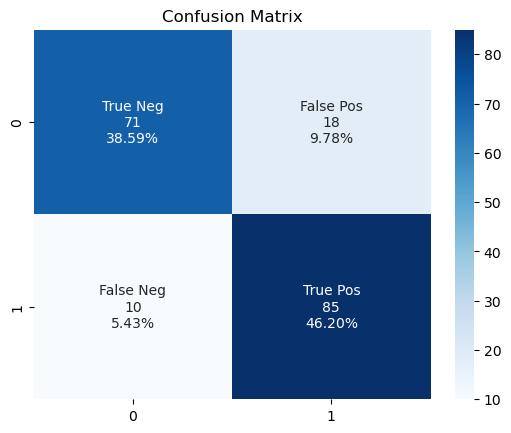

              precision    recall  f1-score   support

           0       0.88      0.80      0.84        89
           1       0.83      0.89      0.86        95

    accuracy                           0.85       184
   macro avg       0.85      0.85      0.85       184
weighted avg       0.85      0.85      0.85       184



In [191]:
model_evaluation(classifier_dt)

In [195]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

In [197]:
classifier_rf = RandomForestClassifier(max_depth = 4,random_state = 0)

In [199]:
model(classifier_rf)

Accuracy :  84.24%
Cross Validation Score :  92.91%
ROC_AUC Score :  84.06%


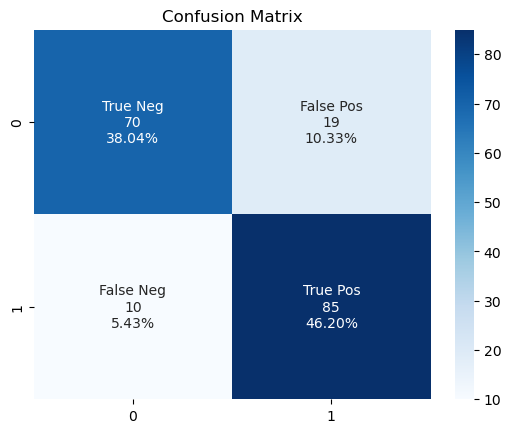

              precision    recall  f1-score   support

           0       0.88      0.79      0.83        89
           1       0.82      0.89      0.85        95

    accuracy                           0.84       184
   macro avg       0.85      0.84      0.84       184
weighted avg       0.85      0.84      0.84       184



In [201]:
model_evaluation(classifier_rf)

In [203]:
#K-nearest Neighbors Classifier
from sklearn.neighbors import KNeighborsClassifier

In [205]:
classifier_knn = KNeighborsClassifier(leaf_size = 1, n_neighbors = 3,p = 1)

In [207]:
model(classifier_knn)

Accuracy :  81.52%
Cross Validation Score :  89.34%
ROC_AUC Score :  81.36%


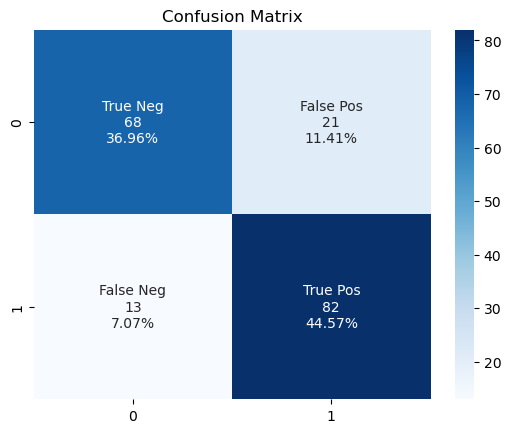

              precision    recall  f1-score   support

           0       0.84      0.76      0.80        89
           1       0.80      0.86      0.83        95

    accuracy                           0.82       184
   macro avg       0.82      0.81      0.81       184
weighted avg       0.82      0.82      0.81       184



In [209]:
model_evaluation(classifier_knn)

Aqui está a tabela organizada com os resultados dos algoritmos de machine learning:

| Sr. No. | ML Algorithm              | Accuracy | Cross Validation Score | ROC AUC Score |
|---------|---------------------------|----------|------------------------|---------------|
| 1       | Logistic Regression       | 87.50%   | 91.12%                 | 87.43%        |
| 2       | Support Vector Classifier | 87.50%   | 90.53%                 | 87.43%        |
| 3       | Decision Tree Classifier  | 84.78%   | 89.09%                 | 84.62%        |
| 4       | Random Forest Classifier  | 84.24%   | 92.91%                 | 84.06%        |
| 5       | K-Nearest Neighbors Classifier | 81.52% | 89.34%                | 81.36%        |

 